# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2301FTDS_TeamFM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA Movie Recommendation

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

...ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?

...it's not just a guess drawn out of the hat. There is an algorithm behind it.

Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of recommending movies;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email:

> With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.
What value is achieved through building a functional recommender system?
 
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. 

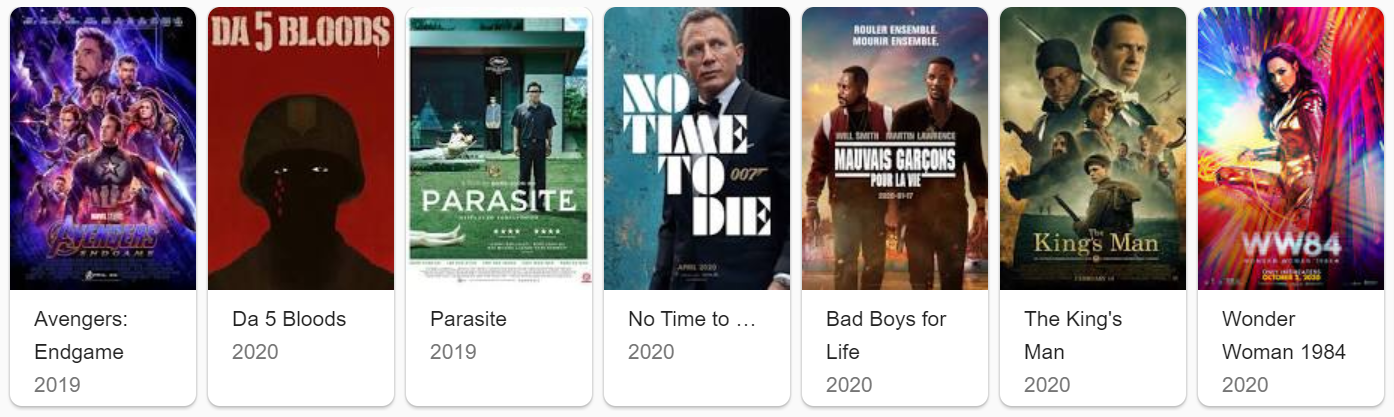

### Team Members
- Nare Moloto
- Mkhanyisi Mlombile
- Ghaalib Van Der Ross 
- Edna Kobo
- Katlego Mthunzi
- Koketso Makofane
- Tshepo Serumula

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Content Based Recommender</a>

<a href=#six>6. Collaborative Filtering</a>

<a href=#seven>7. Model Evaluation</a>

<a href=#eight>8. Conclusion</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---

---

Renting CDs & DVDs, reading local tv listenings, watching film stream projectors or recordings are all the things of the past today. All of the worlds biggest film collection have been digitized and moved to the online streaming services like Netflix, HBO or YouTube. These platforms can now help us with what is possibly the most difficult tasks of all, choosing a movie. They have been enhanced with AI powered capabilities. Well, that is no longer a concern as it is finally time for machine learning to put its skills on display on modern cenamatic landscapes, to create advanced systems for movie expert as data scientists are prepared to investigate our behavioural patterns and those of movies.

Every time you open up YouTube just to figure out the solution to your problem or just get the latest news, you end up spending more time. A similar thing happens when you decided on binging through a single movie/series from an OTT you end up watching more than what you had in your mind. Ever wondered how they were able to do such a thing? Most of the OTT platforms depend on their movie recommendation system.

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging us to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

### What is a Movie Recommendation System

A movie recommendation system, also known as a movie recommender system, uses Machine Learning (ML) to predict or filter users' film preferences based on their prior decisions and actions.
![](https://i.pinimg.com/originals/d9/58/5e/d9585efc140b5d3689b3341aa5c35df1.jpg)

### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

### Sit Back, Allow Us To Get You The Best Movies According To Your Preferences.
![](https://i.pinimg.com/originals/be/b9/1c/beb91c4fb913bbb224d5e90c5d497016.gif)



 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

---
There are couple of packages that we will be working with, including the famous Surprise(Simple Python RecommendatIon System Engine) library. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. 

Below are all libraries that are used through out this notebook.

In [2]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import difflib
import datetime
import re
import scipy as sp
from scipy.sparse import csr_matrix
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display_html 
from IPython.core.display import HTML
from collections import defaultdict
import os
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate, train_test_split
from sklearn.metrics.pairwise import linear_kernel
from surprise import SVD,accuracy
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import BaselineOnly
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Comet
import comet_ml
from comet_ml import Experiment, OfflineExperiment

import warnings
warnings.filterwarnings("ignore")

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

---
<img src="https://i.imgur.com/sTvsBms.png" width="700" height="400" />

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

#### Source
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

#### Supplied Files
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

***

#### Loading Data for Kaggle

In [ ]:
# df_train = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
# df_test = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')

# df_tags = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/tags.csv")
# df_movies = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')
# df_links = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/links.csv")
# df_imdb = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')
# df_ratings = pd.read_csv("/kaggle/input/movieratingd/ratings.csv")

# genome_tags = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv")
# genome_score = pd.read_csv("/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv")

#### Loading Data Locally and on GitHub

In [4]:
df_train = pd.read_csv('train.csv') # Data size too large for GitHub
df_test = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/test.csv')

df_tags = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/tags.csv')
df_movies = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/movies.csv')
df_links = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/links.csv')
df_imdb = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/imdb_data.csv')
df_ratings = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/ratings.csv')

genome_score = pd.read_csv('genome_scores.csv') # Data size too large for GitHub
genome_tags = pd.read_csv('https://raw.githubusercontent.com/FM4-UNSUPERVISED-TEAM/Data/main/genome_tags.csv')

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---


### 4.1 Previewing the Datasets

It is good practice to view the datasets that we intend to work with before blindly proceeding through to modeling. With the aid of the head() function we are provided with a view of the first five lines of the available datasets.

****
**Training Dataset**

In [5]:
# Displaying the first 5 rows of the 'df_train' DataFrame for an overview of the data.
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Train:

- `userId` : Unique number assigned to the user
- `movieId` : Unique Number used as an identifier for list of available movies.
- `rating` : Ratings are based on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- `timestamp` : Represents the seconds that have elapsed since midnight Coordinated Universal Time (UTC) of January 1, 1970.

**Test Dataset**

In [6]:
# Displaying the first 5 rows of the 'df_test' DataFrame for an overview of the data.
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


**Tags Dataset**

In [5]:
# Displaying the first 5 rows of the 'df_tags' DataFrame for an overview of the data.
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


tags:

- `userId` : Unique number assigned to the user
- `movieId` : Unique Number used as an identifier for list of available movies.
- `tag` : User-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and * purpose of a particular tag is determined by each user.
- `timestamp` : Represents the seconds that have elapsed since midnight Coordinated Universal Time (UTC) of January 1, 1970.

**Movies Dataset**

In [6]:
# Displaying the first 5 rows of the 'df_movies' DataFrame for an overview of the data.
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movies:

- `movieId`: Unique Number used as an identifier for list of available movies.
- `title` : These were entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.
- `genres`: Genres are a pipe-separated list, and are selected from the following:

In [7]:
# Unique genres from the 'genres' column in the DataFrame
# Split the values using '|' as the delimiter to create lists of genres
unique_genres = df_movies['genres'].str.split('|').explode().unique()

# Print the unique genres
print(unique_genres)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


The code provided is used to extract unique genres from the 'genres' columb in the 'df_movies' dataframe. 

Listed below are the steps involved:

1. `str.split('|')`: This splits the values in the 'genres' column using the '|' character, thereafter, creating a list of genres for each row.

2. `explode()`: Separate rows will be created for genre listed with the corresponding information from the other columns.

3. `unique()`: This function extracts the unique genres.

The print(unique_genres) line will display an array containing all the unique genres present in the 'genres' column of the 'df_movies' DataFrame using the the list 'unique_genres' list that was created.

**Links Dataset**

In [8]:
# Displaying the first 5 rows of the 'df_links' DataFrame for an overview of the data.
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links:

- `movieId` : Identifier for movies used by https://movielens.org
- `imdbId` : Identifier for movies used by http://www.imdb.com
- `tmdbId` : An identifier for movies used by https://www.themoviedb.org.

**IMDB Dataset**

In [9]:
# Displaying the first 5 rows of the 'df_imdb DataFrame for an overview of the data.
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


**Genome Score Dataset**

In [10]:
# Displaying the first 5 rows of the 'genome_score' DataFrame for an overview of the data.
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


genome-scores:

- `movieId` : Identifier for movies
- `tagId` :
- `relevance` :

**Genome Tags Dataset**

In [11]:
# Displaying the first 5 rows of the 'genome_tags' DataFrame for an overview of the data.
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


genome-tags:

- `tagId` :
- `tag` : tag descriptions for the tag IDs in the genome file

By choosing to view the datasets along side each other in a single window we can easily compare the all features for the listed datasets.

The function created below allows us access to that particular view. This function is useful for visually comparing the contents of multiple DataFrames side by side.

In [12]:
# Function that displays multiple dataframes in one cell
# The function below, 'data_overview', generates an HTML table to display an overview of data from multiple dataframes passed as a list. The function takes two arguments:
def data_overview(dataframe_list, column_names=[]):

# Initialize an empty string html_string, which will be used to build the HTML table.
    html_string = ''
# If column_names is provided, create a table row (<tr>) containing table header cells (<td>) with the column names.
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
# For each DataFrame in dataframe_list, generate an HTML representation of the DataFrame using to_html() method. Each DataFrame is wrapped in a table cell (<td>) and added to a new row (<tr>).
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list)
                    +'</tr>')
# Combine all the rows into the html_string. Wrap the entire content in a <table> tag.
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [13]:
# Display the overview of train, test, links and tags dataframes
data_overview([df_train.head(), df_test.head(), df_links.head(), df_tags.head()], 
              column_names=['Train','Test','Links','Tags'])

Train Test Links Tags 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455

In [14]:
# Display the overview of movies, genome_tags and genome_scores dataframes
data_overview([df_movies.head(), genome_score.head(), genome_tags.head(),df_ratings.head()], 
                      column_names=['Movies','Genome Scores','Genome Tags','Ratings'])

Movies,Genome Scores,Genome Tags,Ratings
,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250


***
### 4.2 Examining the Information of the Datasets

The information function provides a quick overview of the dataset which highlights the important details such as the number of rows, the number of columns, the null values, the data types of each feature or column, and the memory usage. 

Therefore, we can assess the data quality, identify inconsistent data types, and determine the necessary data preprocessing steps.

****
**Training Dataset**

In [15]:
# Displaying the concise summary of the 'df_train' DataFrame.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


**Test Dataset**

In [16]:
# Displaying the concise summary of the 'df_test' DataFrame.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


**Tags Dataset**

In [17]:
# Displaying the concise summary of the 'df_tags' DataFrame.
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


**Movies Dataset**

In [18]:
# Displaying the concise summary of the 'df_movies' DataFrame.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Links Dataset**

In [19]:
# Displaying the concise summary of the 'df_links' DataFrame.
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


**IMDB Dataset**

In [20]:
# Displaying the concise summary of the 'df_imdb' DataFrame.
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


**Genome Score Dataset**

In [21]:
# Displaying the concise summary of the 'genome_score' DataFrame.
genome_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


**Genome Tags Dataset**

In [22]:
# Displaying the concise summary of the 'genome_tags' DataFrame.
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


***
### 4.3 Examining the Datasets for Null values

As was mentioned previously, with regards to the info() function, the null() function also provides insights into the data quality so that we can better understand if there are any missing values that need to be addressed. By examining the null values it allows us to determine how to handle the missing data (in an appropriate manner), and to mitigate any bias as it could reduce the validity and accuracy of the model.

**Total null value per column per Dataset**

In [23]:
# Checking the number of null values in each column of the 'df_train' DataFrame.
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [24]:
# Checking the number of null values in each column of the 'df_test' DataFrame.
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [25]:
# Checking the number of null values in each column of the 'df_tags' DataFrame.
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [26]:
# Checking the number of null values in each column of the 'df_movies' DataFrame.
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [27]:
# Checking the number of null values in each column of the 'df_links' DataFrame.
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [28]:
# Checking the number of null values in each column of the 'df_tags' DataFrame.
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [29]:
# Checking the number of null values in each column of the 'genome_score' DataFrame.
genome_score.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [30]:
# Checking the number of null values in each column of the 'genome_tags' DataFrame.
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

**Summary of Observations from the Datasets:**
1. The tags dataset has 16 missing values in the tag column.
2. The links dataset has 107 missing values in the tmdbId column.
3. The imdb_data dataset has a range of missing values. 

We will take a closer look at the three aforementioned datasets in order to determine the how best to address the issue of missing values/information.

In [31]:
def Percent_null(null_sum,df):    
    
    # Create a DataFrame with the shape and null values information
    summary_table = pd.DataFrame({
        'Column': null_sum.index,
        'Null Values': null_sum.values,
        'Percentage': null_sum.values / len(df) * 100
    })

    # Add the shape information to the table
    summary_table['Shape'] = [df.shape[0], ''] + [''] * (len(null_sum) - 2)

    # Set the 'Column' as the index
    summary_table.set_index('Column', inplace=True)

    # Display the table
    return summary_table

### Function Explanation: Percent_null

The `Percent_null` function is a Python function that takes two parameters, `null_sum` and `df`. It generates a summary table with information about the number of null values for each column in the DataFrame `df`.

#### Parameters:

- `null_sum`: This parameter contains information about the number of null values in each column of the DataFrame `df`.
- `df`: This parameter represents the input DataFrame for which the summary table will be generated.

#### Function Steps:

1. Creating the Summary Table: The function creates a new DataFrame called `summary_table`. It uses the `pd.DataFrame()` constructor to create the DataFrame with the following columns - `Column`, `Null Values`, `Percentage` and `Shape`.

2. Populating the Summary Table: The `summary_table` DataFrame is populated using information from the null_sum Series and the DataFrame `df`. `Column` is filled with the column names of the null_sum Series. `Null Values` is filled with the null counts from the null_sum Series. `Percentage` is calculated by dividing the `Null Values` by the total number of rows in the DataFrame df and then multiplying by 100 so the value is displayed as a percentage.

3. Shape Information: The `Shape` column is populated with the number of rows in the DataFrame df, with only the first row being populated.

4. Setting the Index: The `Column` column is set as the index of the `summary_table` DataFrame using the `set_index()` method with `inplace=True`.

5. Returning the Summary Table: The function returns the `summary_table` DataFrame, which contains information about the number of null values, their percentage, and the shape of the DataFrame for each column in `df`.


In [32]:
# Calling the 'Percent_null' function to generate a summary table for the 'df_tags' DataFrame
Percent_null(df_tags.isnull().sum(),df_tags)

,Null Values,Percentage,Shape
Column,,,
userId,0,0.000000,1093360
movieId,0,0.000000,
tag,16,0.001463,
timestamp,0,0.000000,


In [33]:
# Calling the 'Percent_null' function to generate a summary table for the 'df_links' DataFrame
Percent_null(df_links.isnull().sum(),df_links)

,Null Values,Percentage,Shape
Column,,,
movieId,0,0.000000,62423
imdbId,0,0.000000,
tmdbId,107,0.171411,


In [34]:
# Calling the 'Percent_null' function to generate a summary table for the 'df_imdb' DataFrame
Percent_null(df_imdb.isnull().sum(),df_imdb)

,Null Values,Percentage,Shape
Column,,,
movieId,0,0.000000,27278
title_cast,10068,36.908864,
director,9874,36.197668,
runtime,12089,44.317765,
budget,19372,71.016937,
plot_keywords,11078,40.611482,


**Visual of the IMDB Dataset Missing Values**

The code provided below aims to visualize and emphasize the presence of null values in the 'df_imdb' DataFrame using a bar graph. Null (or missing) values are essential to identify as they can impact the quality and reliability of data analysis and machine learning models.

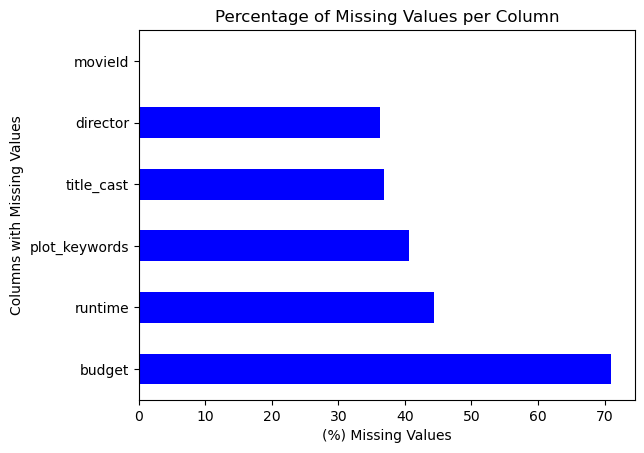

In [35]:
# Calculate the total number of missing values for each column
total = df_imdb.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column
percent_1 = (df_imdb.isnull().sum() / df_imdb.isnull().count() * 100).sort_values(ascending=False)

# Round the percentage values to one decimal place
percent_2 = percent_1.round(1)

# Create a DataFrame with the total and percentage of missing values
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '(%) missing'])

# Plot the percentage of missing values per column
missing_data['(%) missing'].plot(kind='barh', color='blue')
plt.rcParams["figure.figsize"] = (14, 7)
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

The bar graph is an effective visual representation because it allows us to quickly identify columns with a high percentage of missing values.

By plotting the percentage of missing values per column, we gain insights into the data quality and can make informed decisions about how to handle missing data. If certain columns have a large proportion of missing values, we may need to consider strategies such as data imputation, removal of columns with excessive missing data, or other preprocessing techniques to ensure the accuracy and validity of our analyses and models.

***
### 4.4 Creating New Datasets

In order to accurately depict the data and provide meaningful insights to the stakeholders, we need to understand that the existing nine datasets provided for this analysis are individually limited in terms of the amount of data they contain. As a result, the creation of new datasets is necessary to ensure a comprehensive and reliable representation of the data. 

The steps and methodology are provided below for generating the new datasets, which will enable us to draw valuable insights.

**Merged Dataset**

In [36]:
# Remove/Drop 'userId' and 'timestamp' columns from 'df_train' and store the result in 'train'
train = df_train.drop(['userId', 'timestamp'], axis=1)

# Group 'train' by 'movieId' and calculate the mean rating for each movie.
train = train.groupby('movieId')['rating'].mean().reset_index()

# Displaying the first 5 rows of the 'train' DataFrame for an overview of the data.
train.head()

,movieId,rating
0,1,3.889971
1,2,3.263414
2,3,3.132325
3,4,2.878099
4,5,3.059165


In [37]:
# Remove/Drop 'userId', 'rating' and 'timestamp' columns from 'df_train' and store the result in 'views'
views = df_train.drop(['userId','rating','timestamp'], axis=1)

# Count the number of occurrences of each 'movieId' and reset the index
views = views['movieId'].value_counts().reset_index()

# Rename the columns to 'movieId' and 'Views'
views.columns = ['movieId', 'views']

# Displaying the first 5 rows of the 'views' DataFrame for an overview of the data.
views.head()

,movieId,views
0,318,32831
1,356,32383
2,296,31697
3,593,29444
4,2571,29014


In [38]:
# Remove/Drop 'userId' and 'timestamp' columns from 'df_tags' and store the result in 'tags'
tags = df_tags.drop(['userId','timestamp'], axis=1)

# Convert the 'tag' column to string type
tags['tag'] = tags['tag'].astype(str)

# Group the DataFrame 'tags' by 'movieId', concatenate/join the 'tag' values for each movie and reset the index
tags = tags.groupby('movieId')['tag'].agg(' '.join).reset_index()

# Displaying the first 5 rows of the 'tags' DataFrame for an overview of the data.
tags.head()

,movieId,tag
0,1,Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Robin Williams time travel fantasy based on ch...
2,3,funny best friend duringcreditsstinger fishing...
3,4,based on novel or book chick flick divorce int...
4,5,aging baby confidence contraception daughter g...


In [39]:
# Create a new DataFrame 'movies' with a copy of DataFrame 'df_movies'
movies = df_movies.copy()

# Displaying the first 5 rows of the 'movies' DataFrame for an overview of the data.
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
# Create a new DataFrame 'imdb' with a copy of DataFrame 'df_imdb'
imdb = df_imdb.copy()

# Applies a lambda function to clean the 'budget' column
# Remove non-numeric characters and convert the values to integers if they start with a dollar sign ('$'). Null values are replaced with None.
imdb['budget'] = imdb['budget'].apply(lambda x: int(re.sub("[^0-9]", "", x)) if str(x)[:1] == '$' else None) 

# Replace the pipe characters with spaces in the 'plot_keywords' column
imdb['plot_keywords'] = imdb['plot_keywords'].str.replace('|', ' ')

# Displaying the first 5 rows of the 'imdb' DataFrame for an overview of the data.
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy rivalry cowboy cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000.0,board game adventurer fight game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,25000000.0,boat lake neighbor rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,16000000.0,black american husband wife relationship betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000.0,fatherhood doberman dog mansion


In [41]:
# Merge 'train' and 'tags' dataframes on 'movieId'
merged_df = pd.merge(movies, tags, on='movieId', how='left')

# Merge the result with 'movies' dataframe on 'movieId'
merged_df = pd.merge(merged_df, imdb, on='movieId', how='left')

# Merge the result with 'train' dataframe on 'movieId'
merged_df = pd.merge(merged_df, train, on='movieId', how='left')

# Merge the result with 'views' dataframe on 'movieId'
merged_df = pd.merge(merged_df, views, on='movieId', how='left')

In [42]:
# Get the shape of the DataFrame 'merged_df', use the 'shape' attribute.
# Return a tuple representing the number of rows and columns in the DataFrame 'merged_df'.
merged_df.shape

(62423, 11)

In [43]:
# Checking the number of null values in each column of the 'merged_df' DataFrame.
merged_df.isnull().sum()

movieId              0
title                0
genres               0
tag              17172
title_cast       47222
director         47076
runtime          48902
budget           56477
plot_keywords    48039
rating           14210
views            14210
dtype: int64

In [44]:
# selecting the relevant features for recommendation
features = ['tag','genres','title_cast','director','plot_keywords','rating','views','budget','runtime']

# Print the list of features.
print(features)

['tag', 'genres', 'title_cast', 'director', 'plot_keywords', 'rating', 'views', 'budget', 'runtime']


In [45]:
# replacing the null valuess with null string

for feature in features:
    merged_df[feature] = merged_df[feature].fillna('')

In [46]:
# Checking the number of null values in each column of the 'merged_df' DataFrame.
merged_df.isnull().sum()

movieId          0
title            0
genres           0
tag              0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
rating           0
views            0
dtype: int64

In [47]:
# Displaying the first 5 rows of the 'merged_df' DataFrame for an overview of the data.
merged_df.head()

,movieId,title,genres,tag,title_cast,director,runtime,budget,plot_keywords,rating,views
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Owned imdb top 250 Pixar Pixar time travel chi...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy rivalry cowboy cgi animation,3.889971,23062.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams time travel fantasy based on ch...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000.0,board game adventurer fight game,3.263414,9654.0
2,3,Grumpier Old Men (1995),Comedy|Romance,funny best friend duringcreditsstinger fishing...,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,25000000.0,boat lake neighbor rivalry,3.132325,4727.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,based on novel or book chick flick divorce int...,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,16000000.0,black american husband wife relationship betra...,2.878099,968.0
4,5,Father of the Bride Part II (1995),Comedy,aging baby confidence contraception daughter g...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000.0,fatherhood doberman dog mansion,3.059165,4648.0


**New Movie Genre Dataset**

In [48]:
# Split the 'genres' column using '|' delimiter, expand into separate columns and reset the index.
unique_genres_df = merged_df['genres'].str.split('|', expand=True).stack().value_counts().reset_index()

# Rename the columns to 'Genre' and 'Genre_Count'
unique_genres_df.columns = ['Genre', 'Genre_Count']

# Displaying the first 5 rows of the 'unique_genres_df' DataFrame for an overview of the data.
unique_genres_df.head()

,Genre,Genre_Count
0,Drama,25606
1,Comedy,16870
2,Thriller,8654
3,Romance,7719
4,Action,7348


**New Movie Cast Dataset**

In [49]:
# Split the 'title_cast' column using '|' delimiter, expand into separate columns and reset the index.
unique_actor_df = merged_df['title_cast'].str.split('|', expand=True).stack().value_counts().reset_index()

# Rename the columns to 'Actor' and 'Actor_Movies'
unique_actor_df.columns = ['Actor', 'Actor_Movies']

# Displaying the first 5 rows of the 'unique_actor_df' DataFrame for an overview of the data.
unique_actor_df.head()

,Actor,Actor_Movies
0,,47222
1,Samuel L. Jackson,79
2,Steve Buscemi,65
3,Robert De Niro,57
4,Gérard Depardieu,55


**Average Rating per Genre Dataset**

In [50]:
# Remove/Drop 'timestamp' column from 'df_train' and store the result in 'df_t'
df_t = df_train.drop('timestamp', axis=1)

# Merge 'df_t' and 'df_movies' dataframes on 'movieId'
df_new_movies = pd.merge(df_t, df_movies, on='movieId', how='left')

# Displaying the first 5 rows of the 'df_new_movies' DataFrame for an overview of the data.
df_new_movies.head()

,userId,movieId,rating,title,genres
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller


In [51]:
# Remove/Drop 'timestamp' column from 'df_new_movies' and store the result in 'avg_genre_ratings'
avg_genre_ratings = df_new_movies.drop(['userId','movieId','title'], axis=1)

# Group 'avg_genre_ratings' by 'genres', calculate the mean rating for each movie and reset the index
avg_genre_ratings = avg_genre_ratings.groupby('genres')['rating'].mean().reset_index()

# Displaying the first 5 rows of the 'avg_genre_ratings' DataFrame for an overview of the data.
avg_genre_ratings.head()

,genres,rating
0,(no genres listed),3.327669
1,Action,2.938843
2,Action|Adventure,3.699237
3,Action|Adventure|Animation,3.665576
4,Action|Adventure|Animation|Children,3.553264


#### The average budget for each genre

In [52]:
# Select only the 'genres' and 'budget' columns
budget_df = merged_df.loc[:, ['genres', 'budget']]

# Displaying the first 5 rows of the 'budget_df' DataFrame for an overview of the data.
budget_df.head()

,genres,budget
0,Adventure|Animation|Children|Comedy|Fantasy,30000000.0
1,Adventure|Children|Fantasy,65000000.0
2,Comedy|Romance,25000000.0
3,Comedy|Drama|Romance,16000000.0
4,Comedy,30000000.0


In [53]:
# Convert the 'budget' column to numeric
budget_df['budget'] = pd.to_numeric(budget_df['budget'], errors='coerce')

# Split the genres and create a new DataFrame with genres as separate rows
genre_df = budget_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
genre_df.name = 'genre'

# Merge the new DataFrame with the original DataFrame to retain budget information
genre_budget_df = budget_df.drop('genres', axis=1).join(genre_df)

# Calculate the average budget for each genre
avg_budget_df = genre_budget_df.groupby('genre')['budget'].mean().reset_index()

# Displaying the first 5 rows of the 'avg_budget_df' DataFrame for an overview of the data.
avg_budget_df.head()

,genre,budget
0,(no genres listed),1.613800e+06
1,Action,5.060366e+07
2,Adventure,6.682899e+07
3,Animation,6.427795e+07
4,Children,5.483333e+07


***
### 4.5 Exploratory Data Analysis: Functions for Visualizations

### Function Explanation: Bar

The Bar function is a Python function that creates a bar plot to visualize data from a given DataFrame. It can generate two types of bar plots based on the provided parameters:
1. A bar plot or...
2. A count plot

#### Parameters:

- `df`: This parameter represents the input DataFrame that contains the data for which the bar plot will be created.
- `n1, n2`: These are optional parameters which represent the range of data to be displayed in the bar plot. The function will display data from the position n1 (inclusive) to the n2 position (exclusive).
- `x, y`: These parameters represent the columns from the DataFrame that will be used for the bar plot. The 'x' parameter is used for the x-axis values, and the 'y' parameter is used for the y-axis values.
- `title`: An optional parameter that specifies the title of the bar plot.

#### Function Steps:

1. Creating the Plot: The function starts by creating a figure for the bar plot using plt.figure() with a specified size (10 inches wide and 6 inches tall).

2. Data Preparation for Bar Plot: If the 'x' parameter is provided, the function treats it as the column for the x-axis values. It converts the data in that column to numeric values using pd.to_numeric() with 'coerce' error handling to handle any invalid entries. It then sorts the DataFrame by the x-axis column in descending order to get the highest-rated movies first. The sns.barplot() function from the Seaborn library is used to create the bar plot, displaying the 'x' values on the x-axis and the 'y' values on the y-axis.

3. Data Preparation for Count Plot: If the `x parameter` is not provided, it means the `y parameter` is being used for the bar plot. The function counts the occurrences of each unique value in the 'y' column using `value_counts()`. It then sorts the counts in descending order to display the most frequent categories first. The `sns.countplot()` function from Seaborn is used to create the bar plot, displaying the counts on the y-axis and the corresponding categories on the x-axis.

4. Setting the Plot Title: After creating the bar plot, the function sets the title of the plot using `ax.set_title()` with the provided `title` parameter.

5. Rotating X-axis Labels: To avoid overlapping of x-axis labels in case of long category names, the function rotates the x-axis labels by 90 degrees using `plt.xticks(rotation=90)`.

6. Displaying the Plot: Finally, the function uses plt.show() to display the created bar plot.


In [54]:
# Define a function for creating a bar plot or count plot based on the arguments provided
def Bar(df, n1=None, n2=None, x=None, y=None, title=None):
    
    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))

    if x is not None:
        df[x] = pd.to_numeric(df[x], errors='coerce')   # Convert the specified 'x' column to numeric
        df_sorted = df.sort_values(by=x, ascending=False)   # Sort the df 'x' column in descending order
        ax = sns.barplot(x=x, y=y, data=df_sorted.iloc[n1:n2])   # Create a bar plot
    else:
        counts = df[y].value_counts()   # Calculate the frequency of unique variables
        counts_sorted = counts.sort_values(ascending=False)   # Sort the frequencies in descending order
        ax = sns.countplot(y=y, data=df, order=counts_sorted.index[n1:n2])   # Create a bar plot

    ax.set_title(title, fontsize=15)
    plt.xticks(rotation=90)   # Rotate x-axis labels by 90 degrees to avoid overlapping 
    plt.show() 

### Function Explanation: Bar_V

The Bar_V function is a Python function that creates a vertical bar plot to visualize the frequency distribution of unique variables in a specified column of a DataFrame.

#### Parameters:

- `df`: This parameter represents the input DataFrame that contains the data for which the bar plot will be created.
- `column`: A string representing the name of the column in the DataFrame for which the frequency distribution will be plotted.
- `Head_Tail`: A string that determines whether the function will display the most frequent ('head') or least frequent ('tail') variables in the column.
- `num`: An integer representing the number of variables to be displayed in the bar plot.
- `title`: A parameter that specifies the title of the bar plot..

#### Function Steps:

1. Calculating Frequency: The function starts by calculating the frequency of unique variables in the specified column of the DataFrame using `df[column].value_counts()`.

2. Selecting Top or Bottom Variables: Based on the provided `Head_Tail parameter`, the function selects either the top `num` most frequent variables or the bottom `num` least frequent variables. If 'Head_Tail' is "head," the function uses `.head(num)` to select the top `num` variables; if it is "tail," it will use `.tail(num)` to select the bottom `num` variables.

3. Sorting Variables: The selected `num` variables are sorted in descending order based on their frequency counts using `top_n.sort_values(ascending=False)`.

4. Creating the Bar Plot: The function creates a vertical bar plot using `sns.barplot()` to generate the bar plot. The 'x' values are set to the index of the sorted 'top_n' variables (i.e. unique variables within the column), and the 'y' values are set to the corresponding frequency counts.

5. Adding Plot Labels: The function sets the plot title, x-axis label, y-axis label, and rotates the x-axis labels by 90 degrees to avoid overlapping using `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.xticks(rotation=90)`.

6. Displaying the Plot: Finally, the function uses plt.show() to display the created bar plot.


In [55]:
# Define a function for creating a bar plot of the top 'num' frequency variables in 'column'
def Bar_V(df, column, Head_Tail, num, title):
    
    # Calculate the frequency of unique variables in column
    counts = df[column].value_counts()

    # Select the top n frequency
    if Head_Tail == "head":
        top_n = counts.head(num)
    elif Head_Tail == "tail":
        top_n = counts.tail(num)

    # Sort the top n frequencies in descending order
    top_n_sorted = top_n.sort_values(ascending=False)

    # Set the color palette
    sns.set_palette(sns.color_palette('binary_r'))

    # Set the figure size for the plot
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot of the top n variables
    sns.barplot(x=top_n_sorted.index, y=top_n_sorted.values, order=top_n_sorted.index)

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees to avoid overlapping 

    return plt.show() # Display the plot

***
### 4.6 Exploratory Data Analysis: Insights from Visualizations

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. EDA is the critical process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it, which will be done below.

### Movie Genres

We start by conducting an analysis of the movies dataframe to find out the most popular and the least popular genres. The code provided generates a count plot for the Top 10 genres based on its frequency by volume.

By identifying the top 10 genres based on their frequency in the dataset, we are able to gain insights into the popularity of different genres from the provided list of movies. This type of information can be used to understand audience preferences and market trends.

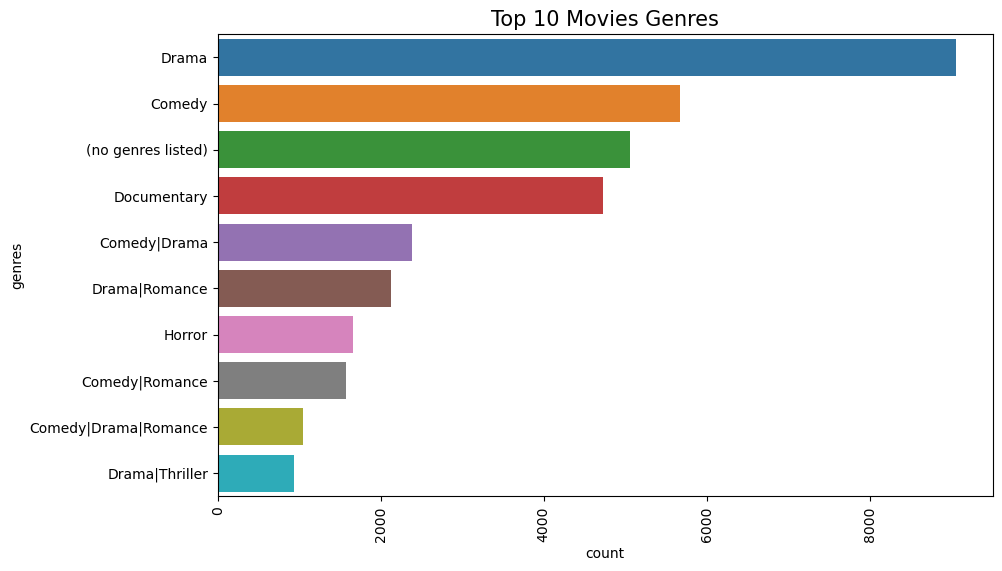

In [56]:
Bar(df_movies, 0, 10, None, 'genres', 'Top 10 Movies Genres')

In [57]:
# This code will count the occurrences of each genre in the 'genres'
# column and store the results in the 'df_genres' Series. The head(10)
# method will retrieve the top 10 genres by volume. Finally, the code will print the top 10 genres.
# The output is in descending order, with the genre name in the index and the count in the corresponding value.

df_genres = df_movies["genres"].value_counts()
df_genres.head(10)

Drama                   9056
Comedy                  5674
(no genres listed)      5062
Documentary             4731
Comedy|Drama            2386
Drama|Romance           2126
Horror                  1661
Comedy|Romance          1577
Comedy|Drama|Romance    1044
Drama|Thriller           933
Name: genres, dtype: int64

In [58]:
# Bottom 10 genres by volume:
df_genres = df_movies["genres"].value_counts()
df_genres.tail(10)

Action|Adventure|Fantasy|Romance|IMAX               1
Crime|Drama|Thriller|Western                        1
Fantasy|Romance|Thriller|IMAX                       1
Adventure|Fantasy|Horror|Romance|Sci-Fi|Thriller    1
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX     1
Action|Adventure|Crime|Fantasy                      1
Drama|Film-Noir|Musical|Thriller                    1
Action|Drama|Horror|Mystery                         1
Adventure|Comedy|Sci-Fi|Thriller|War                1
Comedy|Horror|Mystery|Sci-Fi|Western                1
Name: genres, dtype: int64

Interestingly, we observe that the top genres by volume consist of only one or two genre types, whereas the bottom genres have multiple genres, ranging from 4 - 7. It should be noted that genre categorization can be subjective, and the interpretation can differ as result of individuals and/or sources. Alternatively,  movies may incorporate various genres in order to create new and innovative cinematic experiences.

Next we plot the individual genres from the most common to the least common. This helps us to see the most popular genres: This feature is very important as it will aid in developing a model to make the movie recommendations to the users based on genres.

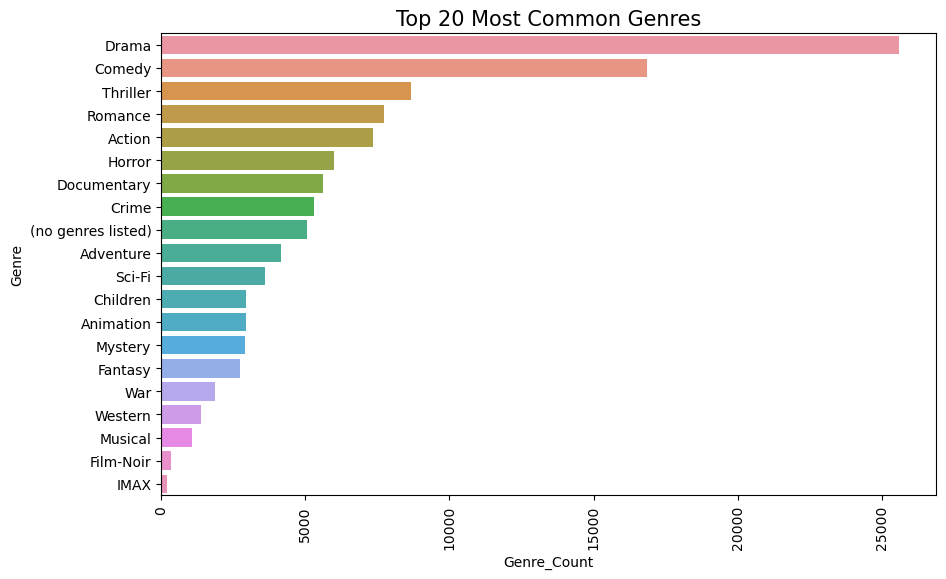

In [59]:
Bar(unique_genres_df, 0, 20, 'Genre_Count', 'Genre', 'Top 20 Most Common Genres')

From the bar graph depicted above, there is a clear indication that Drama is the most common genre preferred by the users from this movies dataset with comedy coming in the second place. The least preferred genres are Musical, Film-Noir and IMAX. From this data, this insinuates that users prefer movies that can make them laugh and have drama in them to movies which songs by the characters are interwoven into the narrative, sometimes accompanied by dancing (Musical Genre).

**Observations:**
* Drama, Comedy, Action, Thriller and adventure are the top 5 genre in the dataset.

**Recommndations:**
* Netflix should endeavor to match the order of genre of movies available in terms of quantity to the popularity of the genre so as to maximise the views, this in turn will maximise the revenue in films.
***

### Movie Ratings

Next we inspect the train dataframe which contains the movie ratings data determined by the user.

#### The Distribution Of The Movie Rations
We investigate how ratings, which range from 0 to 5, incremented by 0.5, are distributed in the df_train dataset. So, we will analyze the movie ratings based on how users rate different movies from 0 to 5.

In [60]:
# Ratings distribution

#The code calculates the count of each rating value in the 'rating' column of the 'df_train' dataframe using
#the value_counts() method. The resulting counts are sorted in descending order by rating value.

data = df_train['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in 
                       (data.values / df_train.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = ['aliceblue']),
               y = data.values
               )
# Create layout
layout = dict(title = 'The Distribution Of The Movie Ratings'.format(df_train.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count Of Ratings'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

From the figure above we observe that 4.0 is the most common score (rated), with 26.5% of the movies in the dataframe assigned that score. This could be explained by the fact that users tend to only rate movies they enjoyed and avoid rating movies which they failed to enjoy. If a user does not enjoy a movie, it is unlikely that they will watch it up until the end and provide a rating. This is why 18% of all the rated movies have a score of less than 3. To support this idea, the most rated stars range from 3 to 5 while the less rated columns are from 0.5 to 2.5. This might also mean that people tend to rate a movie they have watched to the end and actually enjoyed it, rather than a movie which they didn't finish or enjoy.

We also observe that half scores (0.5, 1.5, 2.5, 3.5 and 4.5) are less commonly used than integer score values. We do not know if this is because users prefer to rate movies with integer values or if it's because half scores were introduced after the original scoring system was already in use, leading to a decreased volume in a dataset with ratings from 1995.

**Observations:**
* We can observe that a high percentage of our movies were rated above average i.e above 3
* A low percentage were below 3

**Recommendations:**
* Hence More movies are high quality perhaps people are watching movies that are recommended to them, either by their social groups or the recommender system itself.

***
#### Top Rated Movies.

In this section, we explore the most rated movies from the dataset. 

The `Bar function` that was created in `section 4.5` returns the most popular movies based on the total number of user ratings.

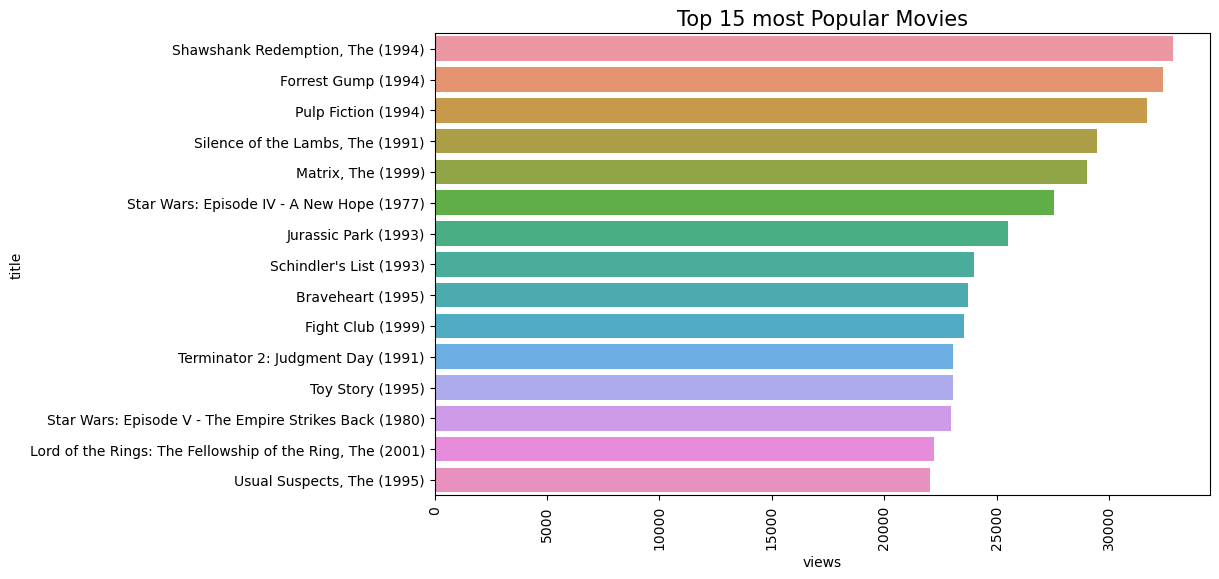

In [61]:
Bar(merged_df, 0, 15, 'views', 'title', 'Top 15 most Popular Movies')

Analyzing the number of times a movie was rated can provide two significant insights:

1. **Popularity**: The number of times a movie has been rated could be a potential indication of the movie's popularity among viewers, based on the assumption that viewers who choose to rate movies generally rate movies only if it resonates with them or if the movie managed to provide a sense of enjoyment. Movies that have been rated frequently suggest a higher level of audience engagement and interest.

2. **Audience Engagement**: The number of ratings received by a movie is a reflection of audience engagement and involvement. A higher number of ratings, regardless of score, is an indication that viewers are actively participating in providing feedback and sharing their opinions.

***
#### Number of Ratings per Movie
We explore how many movies receive a number of ratings and visualize this in a plot.

We group the 'rating' column in a DataFrame called 'df_train' by the 'movieId' column and counts the number of ratings for each movie. The count is then clipped at a maximum value of 50.

In [62]:
# Number of ratings per movie.

data = df_train.groupby('movieId')['rating'].count().clip(upper=50)

# Create trace
# Histogram trace is created using the 'go.Histogram' function from plotly. 
# The 'x' parameter is set to the values of the 'data' variable, which represents
# the counts of ratings per movie. The 'name' parameter assigns a label to the trace.
# The 'xbins' parameter specifies the start, end, and size of the bins for the histogram.
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))

# Create layout
# A layout is created using the 'go.Layout' function, which sets the title of the plot, 
# labels for the x-axis and y-axis, and adjusts the spacing between the bars of the histogram using the 'bargap' parameter.
layout = go.Layout(title = 'Distribution of Number of Ratings Per Movie',
                   xaxis = dict(title = 'Number of Ratings Per movie'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

The figure above shows the distribution of the number of ratings per movie from a DataFrame df_train. The clip function is used to limit the maximum count to 50, ensuring that the histogram does not have overly long bars due to outliers or high counts.

__Observations__:

* Most movies have a relatively low number of ratings: The majority of movies fall within the lower count range, which indicates that most movies receive a limited number of ratings.
* Long-tail distribution: The plot shows a long-tail distribution, where there are a few movies with a significantly higher number of ratings compared to the rest. These are likely popular or blockbuster movies that have received more attention and reviews from users.
* Outliers: There might be a few outliers on the higher end of the count, representing movies with an unusually large number of ratings. These outliers could be influential or polarizing movies that garnered extensive attention from viewers.
* User engagement: The plot can provide insights into user engagement with movies. Movies with higher ratings counts are likely to be more well-known and have received feedback from a broader user base.
* Data quality: The plot can also be used to identify potential data quality issues. For example, movies with very high or very low ratings counts could be outliers or misreported data points.

***
#### Rating per day of week.

The number of ratings for the movies recieved per day of the week.
We first convert a timestamp column to datetime format, extract the days of the week from the timestamp, and create a bar plot of the total number of ratings for each day of the week

In [63]:
# Convert timestamp to datetime
# The 'pd.to_datetime' function is called to convert the 'timestamp' column in the
# 'df_train' DataFrame to datetime format. The 'unit' parameter is set to 'ms' to indicate that the timestamps are in milliseconds.
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'], unit='ms')

# Extract the days of the week from the timestamp column
# The 'dt.dayofweek' attribute is used on the 'timestamp' column to extract the day of the week as an integer, where Monday is 
# represented by 0 and Sunday is represented by 6.
df_train['day_of_week'] = df_train['timestamp'].dt.dayofweek

# A dictionary called 'days' is defined to map the day of the week integer to the corresponding day abbreviation.
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_train['day_of_week'] = df_train['day_of_week'].apply(lambda x: days[x])

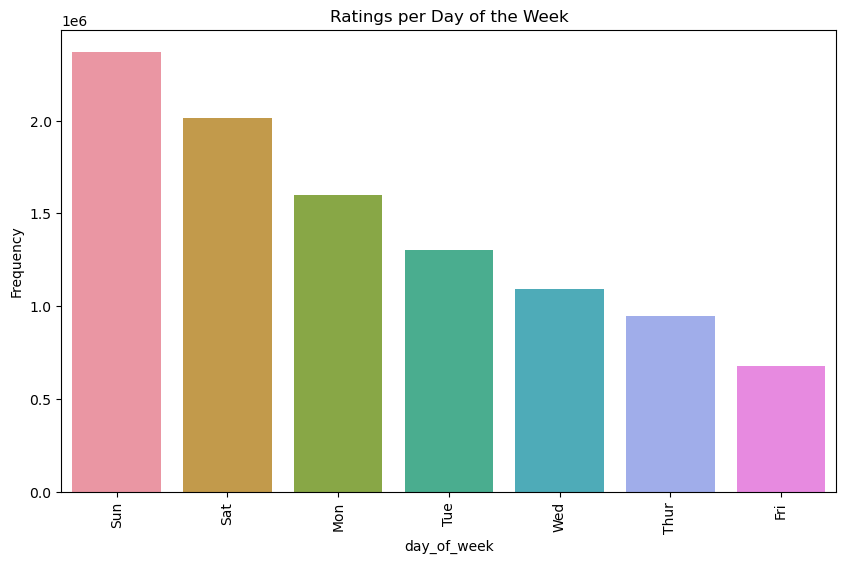

In [64]:
Bar_V(df_train, 'day_of_week', 'head', 10, 'Ratings per Day of the Week')

__Observations:__
* Weekend Peaks: There is a higher number of ratings during weekends (Saturday and Sunday). This could indicate that users are more likely to watch and rate movies during their leisure time, especially on weekends when they have more free time.
* Movie Releases and Marketing: Spikes in ratings on specific days could be linked to movie releases and marketing strategies. For instance, if many movies are released on Fridays, there might be a higher number of ratings on Fridays and Saturdays.
* User Engagement on Specific Days: The ratings per day of the week can help identify which days users are most engaged with the platform. This insight can be useful for scheduling content updates, promotions, or site maintenance.

***
#### Rating Per Movie Genres.

Here we wanted to check the ratings recieved by each movie genres in the dataset by volume.
We first merge the 'df_train' and 'df_movies' DataFrames based on the 'movieId' column and perform a group-by operation to calculate the average rating for each movie genre. We then create a bar plot of the top 15 movie genres based on the average rating.

The average ratings for movie genres can provide useful insights into the popularity of the different genres. Those genres with high average ratings indicate a higher level of audience satisfaction and appreciation for movies in those particular genres and vice versa. This insight will help us understand the genres that resonate most positively with users.

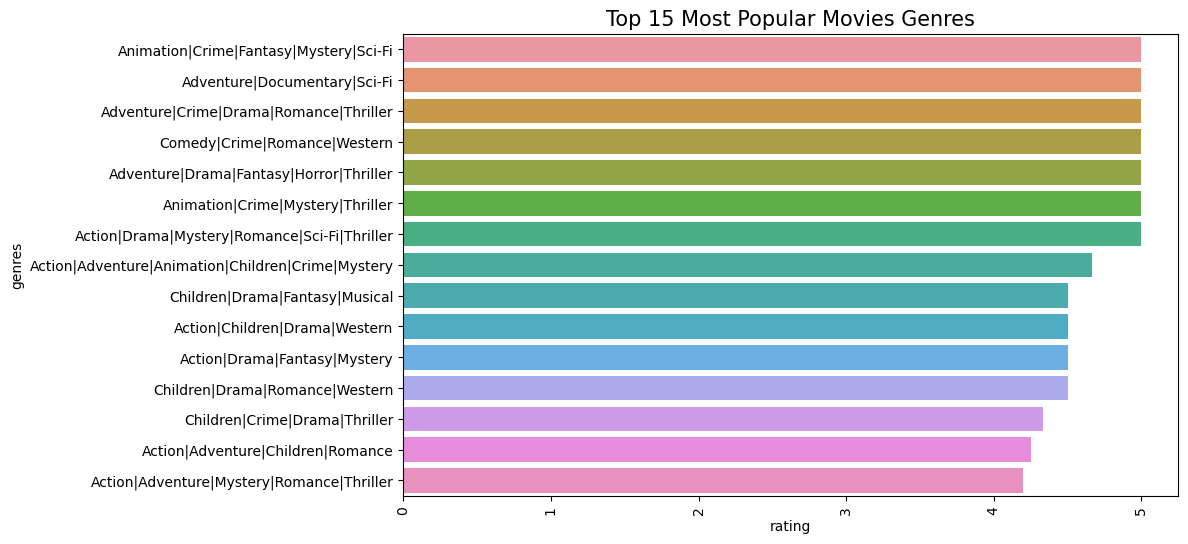

In [65]:
Bar(avg_genre_ratings, 0, 15, 'rating', 'genres', 'Top 15 Most Popular Movies Genres')

__Observations:__
* Most Explored Themes: The most popular genres could represent movie themes and concepts that are more explored in mainstream cinema. This include genres Animation|Crime|Fantasy|Mystery|Sci-Fi.
* More Exposure: These genres might have extended exposure or distribution, leading to more ratings compared to less widely available genres.

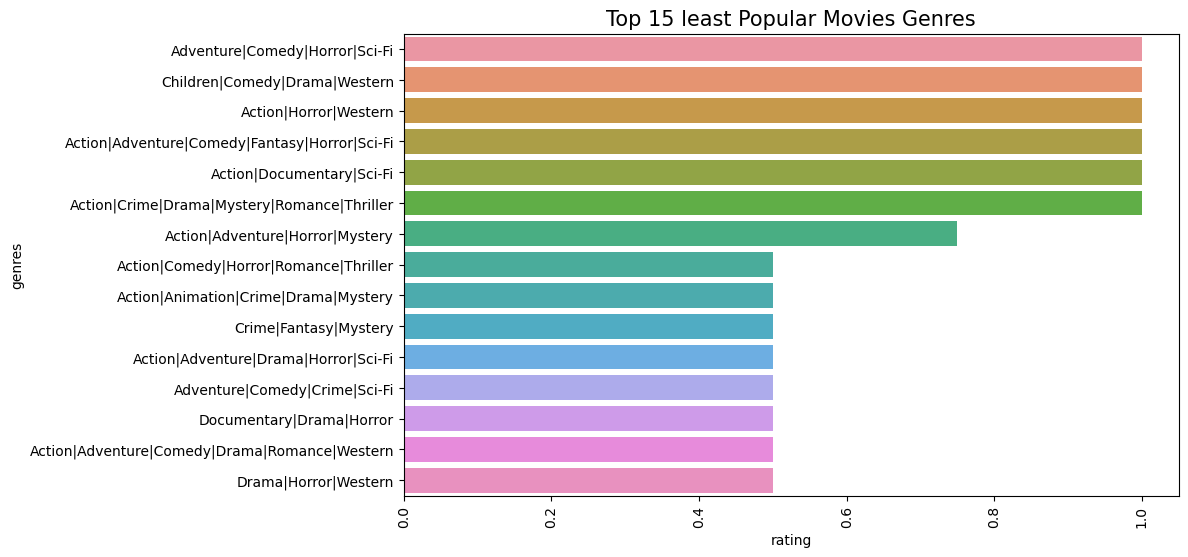

In [66]:
Bar(avg_genre_ratings, -15, None, 'rating', 'genres', 'Top 15 least Popular Movies Genres')

__Observations:__
* Less Explored Themes: The least popular genres could represent movie themes and concepts that are less explored in mainstream cinema. This include genres like Drama|Horror|Western.
* Limited Exposure: These genres might have limited exposure or distribution, leading to fewer ratings compared to more widely available genres.

***
#### Top Users by the Number of Ratings

Examining the most frequent users based on the number of ratings given in the df_train dataset.
We create a bar plot of the top 10 users by the number of ratings they have given.

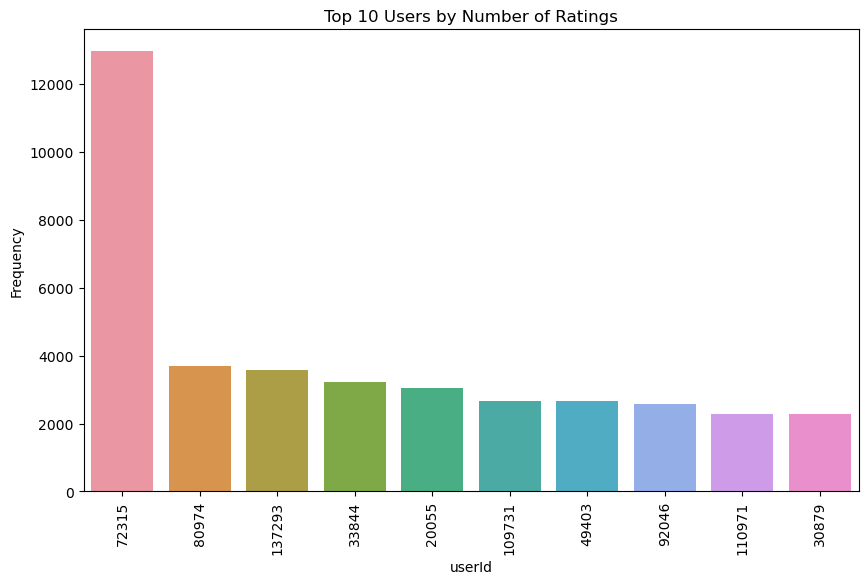

In [67]:
Bar_V(df_train, 'userId', 'head', 10, 'Top 10 Users by Number of Ratings')

__Observations:__
* User Engagement: The chart shows which users are the most active and engaged on the platform, providing the highest number of ratings. These users could be key influencers or frequent users who contribute significantly to the platform's activity.

***
#### Movies Released Per Year

Here we examined the number of movies that are released per year.
We extract the release year from the movie titles in the 'df_movies' DataFrame, filters out movies released before 1978, and then creates a line plot showing the number of movies released per year. 

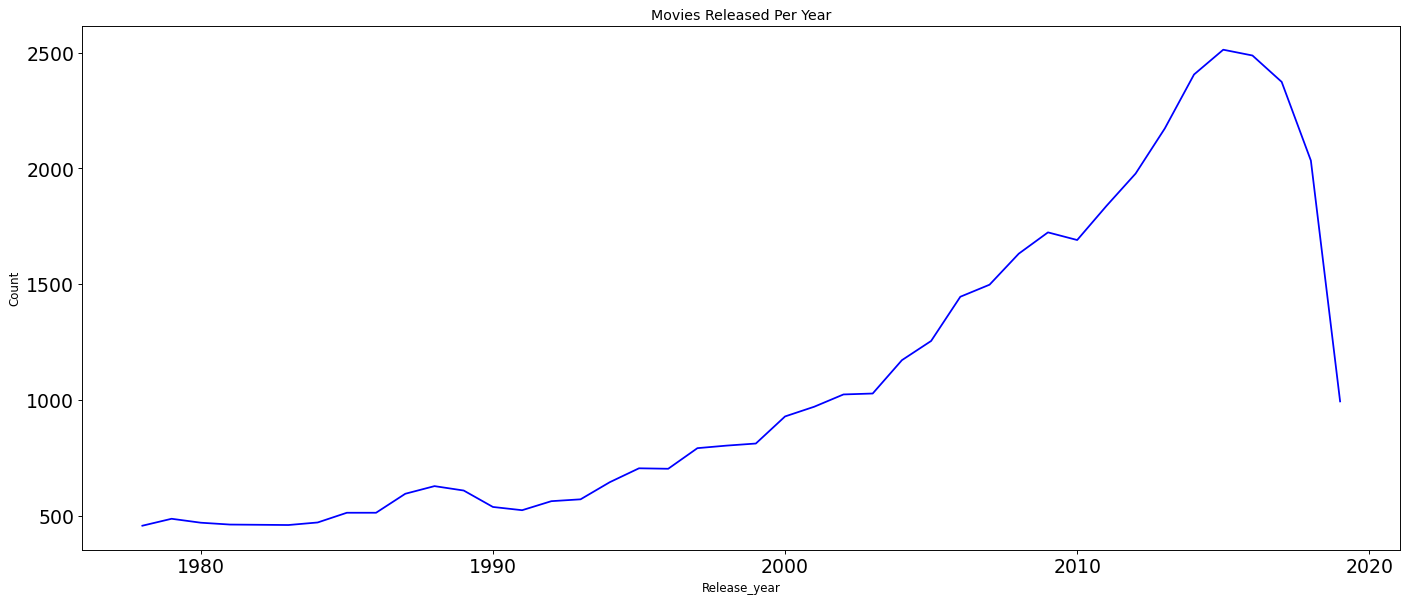

In [68]:
df_m = df_movies.copy()
df_m['year'] = df_m.title.str.extract('\((\d{4})\)', expand=False).dropna().astype('int')
df_m = df_m[(df_m['year'] >= 1978)]
Total_movies = df_m.groupby("year")["movieId"].count().reset_index(name="Movies_count")
fig,ax = plt.subplots(figsize=(20, 8), dpi=85)

Total_movies.plot.line(x='year',y='Movies_count', ax=ax, color='blue', 
                             legend=False, fontsize=16)
ax.set_title('Movies Released Per Year')
ax.set_xlabel('Release_year')
ax.set_ylabel('Count')
plt.show()

Generally, we observe that as the years progress, the amount of movies being released have significantly increased with the most movies released in 2015 and 2016. The number of movies being released per year have definitely shot up since the year 2000.

We also observe that heading to the year of 2020, the number of movies released decreased significantly. This was during the year of COVID-19 which led to the total shutdown of the whole planet to quarantine. This proves significantly why there was a decrease in the number of movies released from the year 2018, 2019 and eventually going into the year of 2020.

**Observations:**
* We observed a decrease in the movies published per year from 2000

**Reccomendations:**
* It is not clear what accounts for the decrease in movies published but possible reasons for this change include finacial crisis in 2000 and in 2009.

***
### Looking At The IMDB Data

We look more into the IMDB dataset to learn more about this movies and the creators or the producers who worked on them.

#### Top Actors By Volume

Analyzing the top actors based on the number of movies they have been cast in can provide several insights:

1. **Popularity and Demand**: By identifying the top actors by volume, base on the data provided, is an indication of the actors popularity and demand within the film industry. Those actors cast in a large number of movies are likely to have a significant fan base and appeal to audiences and filmmakers.

2. **Experience and Versatility**: Actors cast in large number of movies demonstrate their experience and versatility in portraying different roles and genres. These actors clearly possess the necessary skills and range to adapt to various characters and storytelling styles.

3. **Movie Success**: The presence of top actors may have an impact on the success of those films. Their established fan base and reputation can attract viewers and contribute to the box office performance or viewership of the movies regardless on whether the movies is highly rated or not.

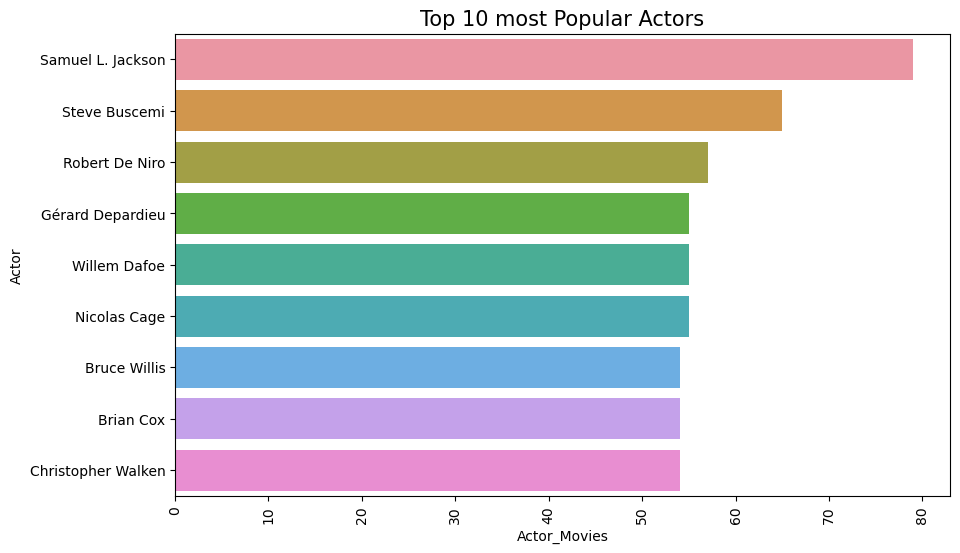

In [69]:
Bar(unique_actor_df, 1, 10, 'Actor_Movies', 'Actor', 'Top 10 most Popular Actors')

***
#### Top 10 Most Popular Movie Directors.

By identifying the most commonly used directors is a clear indication of their popularity, skill and talent within the film industry. Much like the top actors, the presence of top directors will also have an impact on the success of the film. With an established reputation they can attract viewers and contribute to the box office performance or viewership of the movies.

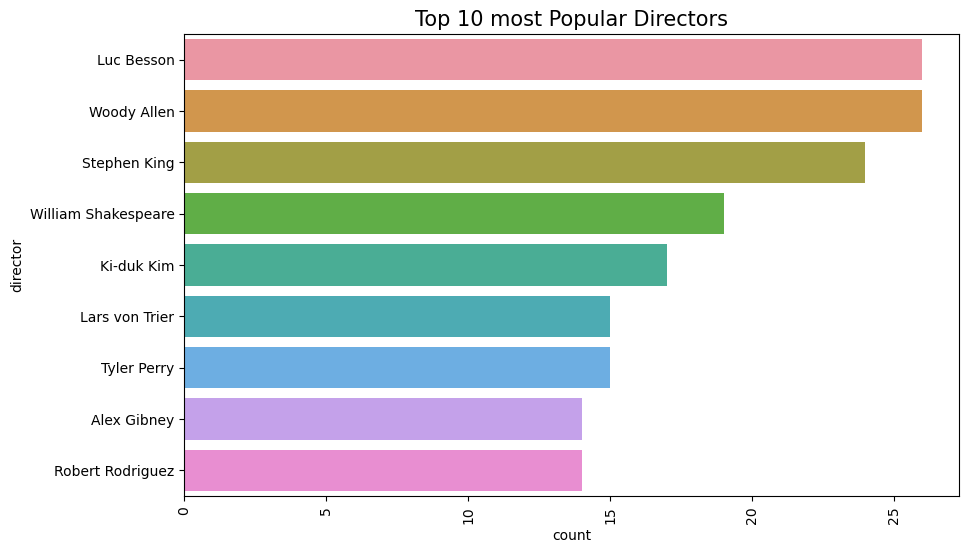

In [70]:
Bar(df_imdb, 1, 10, None, 'director', 'Top 10 most Popular Directors')

***
#### Top Longest Movies
We merge the imdb and the movies dataframes to find the longest movies in the dataset.

We merges two DataFrames (df_movies and df_imdb) based on the "movieId" column and creates a copy named df_movimdb_copy. It then sorts the copy DataFrame by the "runtime" column in descending order. Finally, it plots a horizontal bar chart showing the top 10 longest movies.

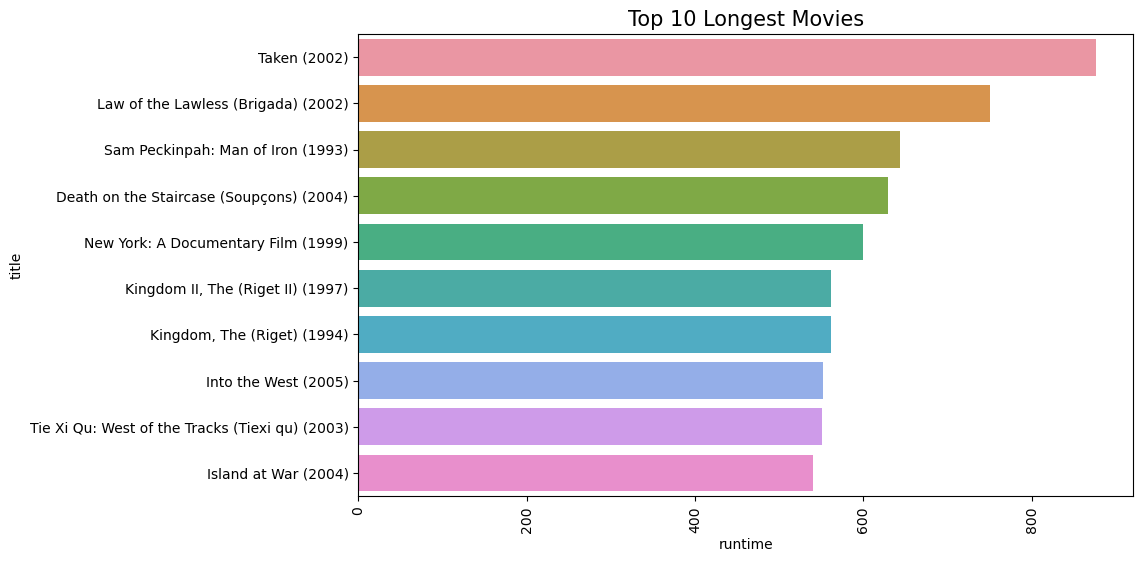

In [71]:
Bar(merged_df, 0, 10, 'runtime', 'title', 'Top 10 Longest Movies')

__Observations:__
* Epic Productions: The presence of extremely long movies among the top 10 suggests that epic and ambitious productions have been popular or significant in the dataset with Taken(2002) toping the chart as the longest movie from the dataset.
* Filmmaking Styles: Long movies often indicate that filmmakers are exploring complex narratives, in-depth character development, or immersive storytelling techniques.

***
#### Top 15 Highest Budget Movies

Despite the significant numver of missing data from the buget column of the merged_df dataset, we are still provided with a view of high budgets provided for certain movies.

If we were to have additional information which provides the revenue for each movie there is scope for extremely valuable insights such as:

**Profitability**: If we compare the revenue-to-budget ratio across different movies we can identify those movies that have been particularly profitable and those who have failed to generate any profit at all. Movies with a high ratio indicate that they have exceeded revenue expectations, therefore, providing profits to the studios and production companies involved.

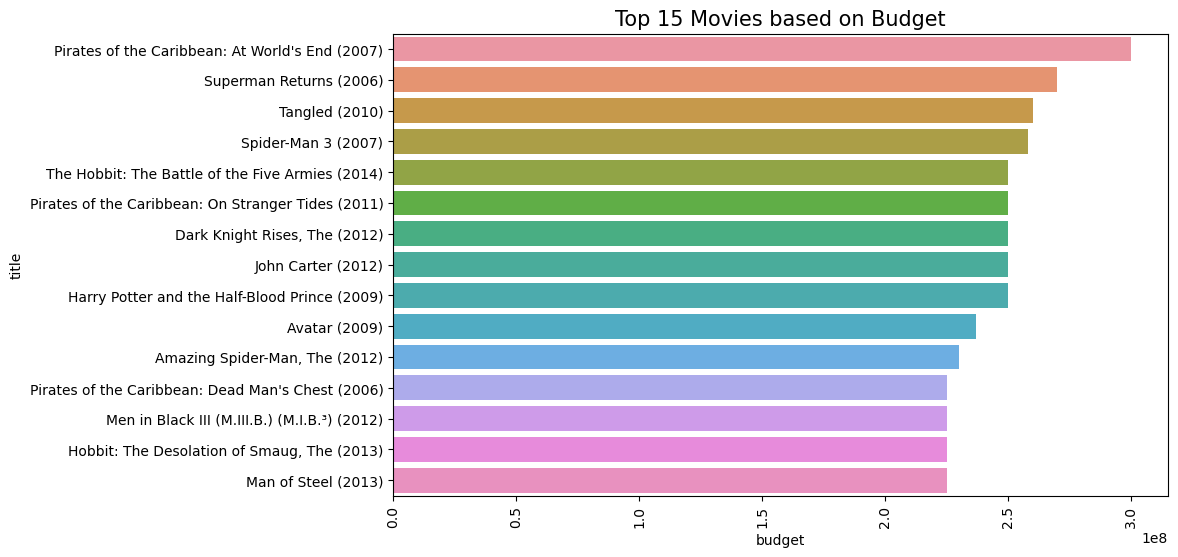

In [72]:
Bar(merged_df, 0, 15, 'budget', 'title', 'Top 15 Movies based on Budget')

***
#### Average Budget per Genre

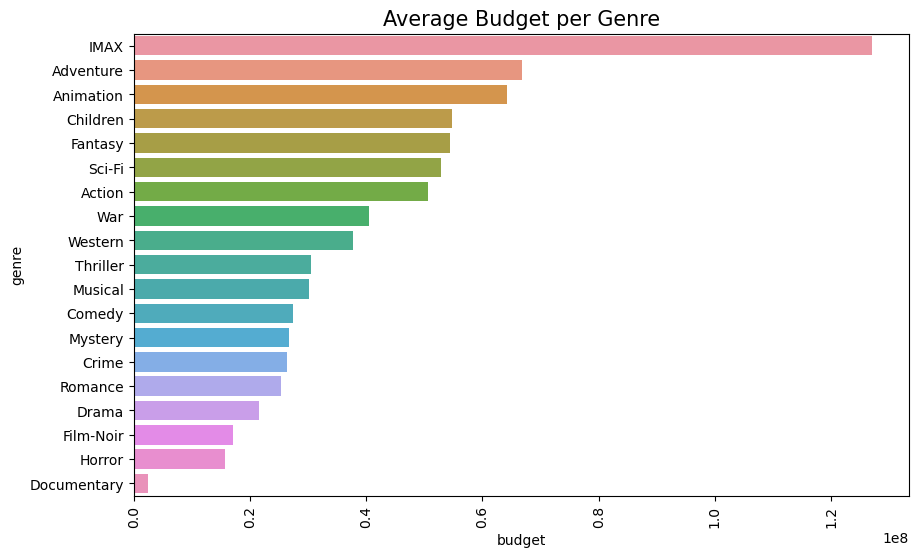

In [73]:
Bar(avg_budget_df, 0, 19, 'budget', 'genre', 'Average Budget per Genre')

The visual above shows the average budget per movie genre. This provides valuable insights into how budgets are distributed across different genres.

__Observations:__

* Genre Budget Comparison: The bar chart allows the compare of the average budgets of different genres directly. We can identify genres with higher budgets and those with lower budgets, giving us an idea of which genres tend to require more significant investments, which in this case is th IMAX followed by Adventure.
* Popular vs. Expensive Genres: By comparing the average budgets with genre popularity, we might identify whether there is a correlation between a genre's popularity and its budget. Some genres may have high budgets due to their appeal to a broader audience, while others might have relatively high budgets despite being less popular. From the 'Most Popular Genre' figure at the top, we showed that Drama is the most popular genre. The insights drawn was that Dramatic movies are cheaper to produce. This is supported by this 'Average Budget per Genre' figure where Drama is shown to have a very low budget.

<a id="five"></a>
## 5. Content Based Recommender
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---
**What Is Content-based Filtering?**

This filtering is based on the description or some data provided for that product. The system finds the similarity between recommended items based on their description or context. The user’s historical preference is taken into account to find products they may like in the future.
For instance, if a user likes movies such as ‘Man in black’ then we can recommend him the movies of ‘Will Smith’ or movies with the genre ‘Sci-fi’.

**Techniques used for our content based filtering:**

We used CountVectoriser that is used in Feature Extraction which entirely is responsible for convecting text into vectors.
The reason why we chose to use count vectoriser instead of tfidVectoriser is to avoid penalising keywords, directors and genres that occurred more frequently essentially because if we have a high count in the dataset this doesn't mean that the word is less important. 

**Why we don't consider Content-based filtering:**

content-based recommendation systems have inherent limitations because of their lack of use of other user data. And because it is inherently retrospective it does not help the user to find discover their potential new favourite movies.
For instance, let’s say that user X and user Y like action movies. User X also likes comedy movies, because you don’t have that knowledge, you keep offering action movies. Eventually, you’re eliminating other options that user Y potentially might like.


**What is cosine similarity?**

Cosine similarity is a technique for measuring the similarity between vectors. It calculates the cosine of the angle between the two vectors. If the angle between the two vectors is zero, the similarity is calculated as 1 because the cosine of zero is 1. So the two vectors are the same. The cosine of any angle varies from 0 to 1. Therefore, similarity rates will vary from 0 to 1. The formula is expressed as follows:

<img src='https://i.imgur.com/ngbZPYu.png' width='500' height='340'>

### 5.1 Content Based Filtering

### Function Explanation: `group_CGM`

The `group_CGM` function is a Python function that takes three parameters - `df`, `column`, and `Cast_Genre_Director`.

#### Parameters:
- `df`: This parameter represents the input DataFrame, on which the function will perform the filtering operation.
- `column`: The name of the column in the DataFrame `df` that needs to be checked for matching the `Cast_Genre_Director`.
- `Cast_Genre_Director`: A string that is used as a search pattern to filter the DataFrame based on matching values in the specified `column`. The matching is case-insensitive.

#### Function Steps:

1. Filtering the DataFrame:
   The function starts by filtering the input DataFrame (`df`) based on whether the values in the specified `column` contain the string provided in `Cast_Genre_Director`. This filtering is performed using the `.str.contains()` method in combination with the DataFrame indexing.

2. Storing Filtered DataFrame:
   The filtered DataFrame is stored in a new variable called `filtered_df`, which contains only the rows that match the search criteria.

3. Return Filtered DataFrame:
   Finally, the function returns the `filtered_df`, which contains the rows from the original DataFrame that match the search pattern in the specified `column`.

In [74]:
def group_CGM(df, column, Cast_Genre_Director):
    # Filtering the DataFrame based on the specified substring
    filtered_df = df[df[column].str.contains(Cast_Genre_Director, case=False)]

    # Return filtered DataFrame with reset index
    return filtered_df.reset_index(drop=True)

#### Filtering based on the genre Children


In [75]:
df_G = group_CGM(merged_df, 'genres', 'Children')
df_G.head()

,movieId,title,genres,tag,title_cast,director,runtime,budget,plot_keywords,rating,views
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Owned imdb top 250 Pixar Pixar time travel chi...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000.0,toy rivalry cowboy cgi animation,3.889971,23062.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams time travel fantasy based on ch...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000.0,board game adventurer fight game,3.263414,9654.0
2,8,Tom and Huck (1995),Adventure|Children,based on a book Mark Twain Peter Hewitt adapte...,Jonathan Taylor Thomas|Brad Renfro|Eric Schwei...,Mark Twain,97.0,NaN,rescue from drowning near drowning character n...,3.052209,498.0
3,13,Balto (1995),Adventure|Animation|Children,Ei muista alaska bear attack dog dog sled dog-...,Kevin Bacon|Bob Hoskins|Bridget Fonda|Jim Cumm...,Cliff Ruby,78.0,NaN,dog nome alaska alaska children,3.357364,645.0
4,27,Now and Then (1995),Children|Drama,1970s coming of age female friendship gynecolo...,Christina Ricci|Rosie O'Donnell|Thora Birch|Me...,I. Marlene King,100.0,NaN,1970s year 1991 1990s year 1970,3.429356,637.0


#### Filtering based on the director 'Mark Twain'


In [76]:
df_D = group_CGM(merged_df, 'director', 'Mark Twain')
df_D.head()

,movieId,title,genres,tag,title_cast,director,runtime,budget,plot_keywords,rating,views
0,8,Tom and Huck (1995),Adventure|Children,based on a book Mark Twain Peter Hewitt adapte...,Jonathan Taylor Thomas|Brad Renfro|Eric Schwei...,Mark Twain,97.0,NaN,rescue from drowning near drowning character n...,3.052209,498.0
1,5076,"Adventures of Huck Finn, The (1993)",Adventure|Children|Comedy|Drama,based on novel or book bloodhound grave diggin...,Elijah Wood|Courtney B. Vance|Robbie Coltrane|...,Mark Twain,108.0,6500000.0,slave boy runaway slave traveling,3.152318,151.0


#### Filtering based on the title_cast 'Leonardo DiCaprio'


In [77]:
df_C = group_CGM(merged_df, 'title_cast', 'Leonardo DiCaprio')
df_C.head()

,movieId,title,genres,tag,title_cast,director,runtime,budget,plot_keywords,rating,views
0,147,"Basketball Diaries, The (1995)",Drama,addiction drugs escape Leonardo DiCaprio New Y...,Leonardo DiCaprio|Lorraine Bracco|Marilyn Soko...,Jim Carroll,102.0,2000000.0,addiction childhood friend student athlete bas...,3.561362,1703.0
1,202,Total Eclipse (1995),Drama|Romance,David Thewlis Great direction Leonardo DiCapri...,Leonardo DiCaprio|David Thewlis|Romane Bohring...,Christopher Hampton,111.0,8000000.0,poet 1870s pregnant wife absinthe,3.064246,179.0
2,303,"Quick and the Dead, The (1995)",Action|Thriller|Western,gunslinger pistol prairie revenge shootout Sam...,Sharon Stone|Gene Hackman|Russell Crowe|Leonar...,Simon Moore,107.0,32000000.0,female gunfighter arizona street shootout show...,3.050919,2612.0
3,337,What's Eating Gilbert Grape (1993),Drama,brother-brother relationship dysfunctional fam...,Johnny Depp|Leonardo DiCaprio|Juliette Lewis|M...,Peter Hedges,118.0,11000000.0,mentally challenged small town countryside rur...,3.753016,6798.0
4,1059,William Shakespeare's Romeo + Juliet (1996),Drama|Romance,Amazing Cinematography Claire Danes Leonardo D...,Leonardo DiCaprio|Claire Danes|John Leguizamo|...,William Shakespeare,120.0,14500000.0,blood cigarette smoking mixed martial arts sty...,3.549438,4268.0


#### Function Explanation: `recommender`

The `recommender` function is a Python function that takes two parameters - `df` and `movie_name`.

##### Parameters:
- `df`: This parameter represents the input DataFrame that contains information about various movies. It is assumed that this DataFrame includes columns such as 'genres', 'tag', 'title_cast', 'director', 'plot_keywords', and 'title'.
- `movie_name`: A string representing the name of the movie for which movie recommendations will be generated.

##### Function Steps:

1. Combining Features:
   The function starts by combining the text data from five selected features - 'genres', 'tag', 'title_cast', 'director', and 'plot_keywords'. These features are concatenated into a single string called 'combine' with space as a separator. Additionally, the '|' character is replaced with a space using the `.str.replace()` method.

2. Feature Vectorization:
   The text data in 'combine' is converted into a feature vector using the Term Frequency-Inverse Document Frequency (TF-IDF) vectorizer. The `TfidfVectorizer` from scikit-learn is used for this purpose. This step transforms the text data into numerical vectors suitable for similarity calculations.

3. Cosine Similarity:
   Using the feature vectors obtained in the previous step, the function calculates the cosine similarity between each pair of movies. The resulting similarity matrix, called 'similarity', represents how similar each movie is to all other movies in the dataset.

4. Finding Close Matches:
   The function then attempts to find a close match for the input 'movie_name' by comparing it to the movie titles available in the DataFrame. It converts all movie titles to lowercase and uses `difflib.get_close_matches()` to find the best match. If no close match is found, the function prints a message indicating the same.

5. Movie Recommendations:
   If a close match is found, the function proceeds to retrieve the index of the movie in the DataFrame and its corresponding similarity scores with all other movies. It sorts the similarity scores in descending order and prints the top 10 recommended movies with their titles. Note that the input movie itself might appear in the recommendations.


In [79]:
def recommender(df, movie_name):
    # combining all the 5 selected features
    combine = df['genres']+' '+df['tag']+' '+df['title_cast']+' '+df['director']+' '+df['plot_keywords']
    combine = combine.str.replace('|', ' ')
    
    # converting the text data to feature vector
    vectorizer = TfidfVectorizer()
    feature_vectors = vectorizer.fit_transform(combine)
    
    # getting the similarity scores using cosine similarity
    similarity = cosine_similarity(feature_vectors)
    
    list_of_all_titles = [title.lower() for title in df['title'].tolist()]
    movie_name_lower = movie_name.lower()
    find_close_match = difflib.get_close_matches(movie_name_lower, list_of_all_titles)

    if len(find_close_match) == 0:
        print('No close match found for the input movie name.')
    else:
        close_match = find_close_match[0]
        index_of_the_movie = df[df['title'].str.lower() == close_match].index[0]

        similarity_score = list(enumerate(similarity[index_of_the_movie]))
        sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

        print('Movies suggested for you:\n')

        i = 1
        for movie in sorted_similar_movies:
            index = movie[0]
            title_from_index = df.loc[index, 'title']
            if i < 11:
                print(i, '.', title_from_index)
                i += 1

#### Seeing recommendations for the movie Toy Story

In [80]:
recommender(df_G, 'toy story')

Movies suggested for you:

1 . Toy Story (1995)
2 . Toy Story 2 (1999)
3 . Bug's Life, A (1998)
4 . Monsters, Inc. (2001)
5 . Toy Story 3 (2010)
6 . Toy Story 4 (2019)
7 . Finding Nemo (2003)
8 . Incredibles, The (2004)
9 . Up (2009)
10 . Ratatouille (2007)


### 5.2 Function Explanation: `movies_by_actor_director`

The `movies_by_actor_director` function is a Python function that takes three parameters - `df`, `column`, and `name`.

#### Parameters:
- `df`: This parameter represents the input DataFrame that contains information about various movies. It is assumed that this DataFrame includes a column named 'title_cast' (or a specified `column`) that contains the cast or director names associated with each movie.
- `column`: A string representing the name of the column in the DataFrame `df` where the cast or director names are stored. This allows the function to work with different columns as needed.
- `name`: A string representing the name of the actor or director for whom you want to find movies.

#### Function Steps:

1. Lowercasing the Input Name:
   The function starts by converting the input `name` into lowercase to ensure case-insensitive matching with the names in the DataFrame.

2. Filtering Movies:
   The function then filters the input DataFrame `df` to find movies that contain the specified `name` in the `column`. It uses the `.str.contains()` method to check for the presence of the lowercased `name` within the `column`.

3. Handling Empty Result:
   If no movies are found for the given `name`, the filtered DataFrame will be empty, and the function will print a message indicating that no movies were found for the provided actor or director name.

4. Sorting Movies by Rating:
   If movies are found, the function proceeds to sort them based on their 'rating' column in descending order. The top 10 highest-rated movies are then selected using the `.head(10)` method.

5. Displaying Movie Titles:
   The function prints the top 10 movie titles associated with the specified actor or director along with their respective positions in the list.




In [81]:
def movies_by_actor_director(df, column,name):
    name_lower = name.lower()

    # Filter movies that contain the actor's name in 'title_cast'
    filtered_df = df[df[column].str.lower().str.contains(name_lower)]

    if filtered_df.empty:
        print(f'No movies found for: {name}.')
    else:
        # Sort movies based on 'rating' column in descending order
        sorted_movies = filtered_df.sort_values(by='rating', ascending=False).head(10)

        print(f'Top 10 movies for {name}:\n')

        for i, (index, movie) in enumerate(sorted_movies.iterrows(), 1):
            print(f"{i}. {movie['title']}")

#### By Director Twain

In [82]:
movies_by_actor_director(merged_df, 'director','Twain')

Top 10 movies for Twain:

1. Adventures of Huck Finn, The (1993)
2. Tom and Huck (1995)


#### By title_cast Dicaprio

In [83]:
movies_by_actor_director(merged_df, 'title_cast','Dicaprio')

Top 10 movies for Dicaprio:

1. Inception (2010)
2. Departed, The (2006)
3. Django Unchained (2012)
4. Shutter Island (2010)
5. Catch Me If You Can (2002)
6. Wolf of Wall Street, The (2013)
7. Blood Diamond (2006)
8. What's Eating Gilbert Grape (1993)
9. IMAX: Hubble 3D (2010)
10. This Boy's Life (1993)


In [84]:
new_df = merged_df.copy()
#extract the year from the title column
new_df['year'] = new_df.title.str.extract('\((\d{4})\)', expand=False).dropna().astype('int')

#extract the decade from the year column
new_df['decade'] = new_df['year'].apply(lambda x: ((x//10)*10))

# replace all empty strings with NaN
new_df['rating'] = new_df['rating'].replace('', np.nan)
new_df['ratings'] = new_df['rating'].astype('float')
new_df = new_df[['title', 'year', 'decade', 'rating', 'views', 'budget', 'runtime', 'director', 'title_cast']]
new_df.head()

,title,year,decade,rating,views,budget,runtime,director,title_cast
0,Toy Story (1995),1995.0,1990.0,3.889971,23062.0,30000000.0,81.0,John Lasseter,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1,Jumanji (1995),1995.0,1990.0,3.263414,9654.0,65000000.0,104.0,Jonathan Hensleigh,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2,Grumpier Old Men (1995),1995.0,1990.0,3.132325,4727.0,25000000.0,101.0,Mark Steven Johnson,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...
3,Waiting to Exhale (1995),1995.0,1990.0,2.878099,968.0,16000000.0,124.0,Terry McMillan,Whitney Houston|Angela Bassett|Loretta Devine|...
4,Father of the Bride Part II (1995),1995.0,1990.0,3.059165,4648.0,30000000.0,106.0,Albert Hackett,Steve Martin|Diane Keaton|Martin Short|Kimberl...


(5946, 9)


<Axes: title={'center': 'Top 50 Decades by Average Budget'}, xlabel='decade'>

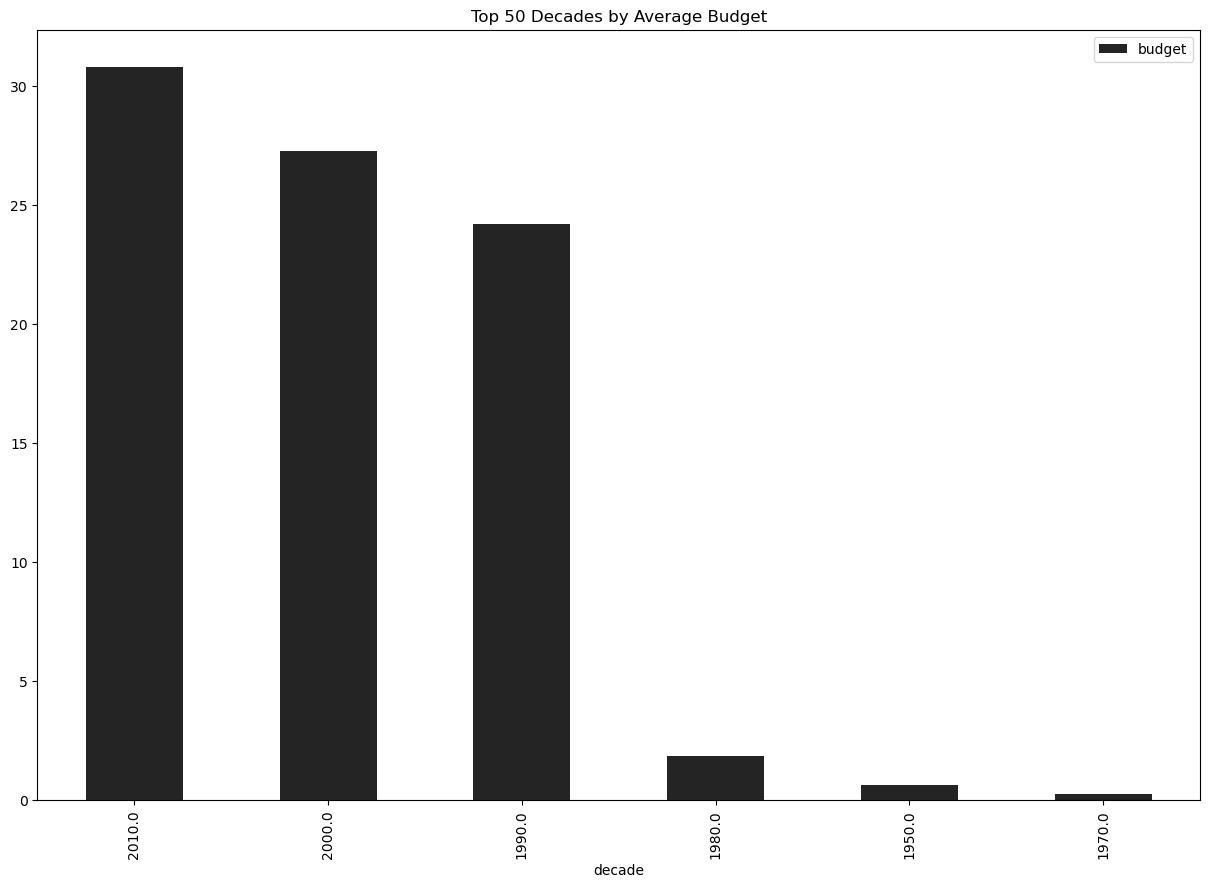

In [85]:

#remove all movies with no budget or nan
new_df2 = new_df[new_df['budget'].notna()]
print(new_df2.shape)
highest_budget_decade = new_df2.groupby(['decade'])['budget'].mean().reset_index()
highest_budget_decade = highest_budget_decade.sort_values(by='budget', ascending=False)
# set budget to millions
highest_budget_decade['budget'] = highest_budget_decade['budget'] / 1000000
highest_budget_decade.head(50)
# plot the highest_budget_decade
highest_budget_decade.head(50).plot(x='decade', y='budget', kind='bar', figsize=(15, 10), title='Top 50 Decades by Average Budget')




<Axes: title={'center': 'Average Rating of Each Year'}, xlabel='year'>

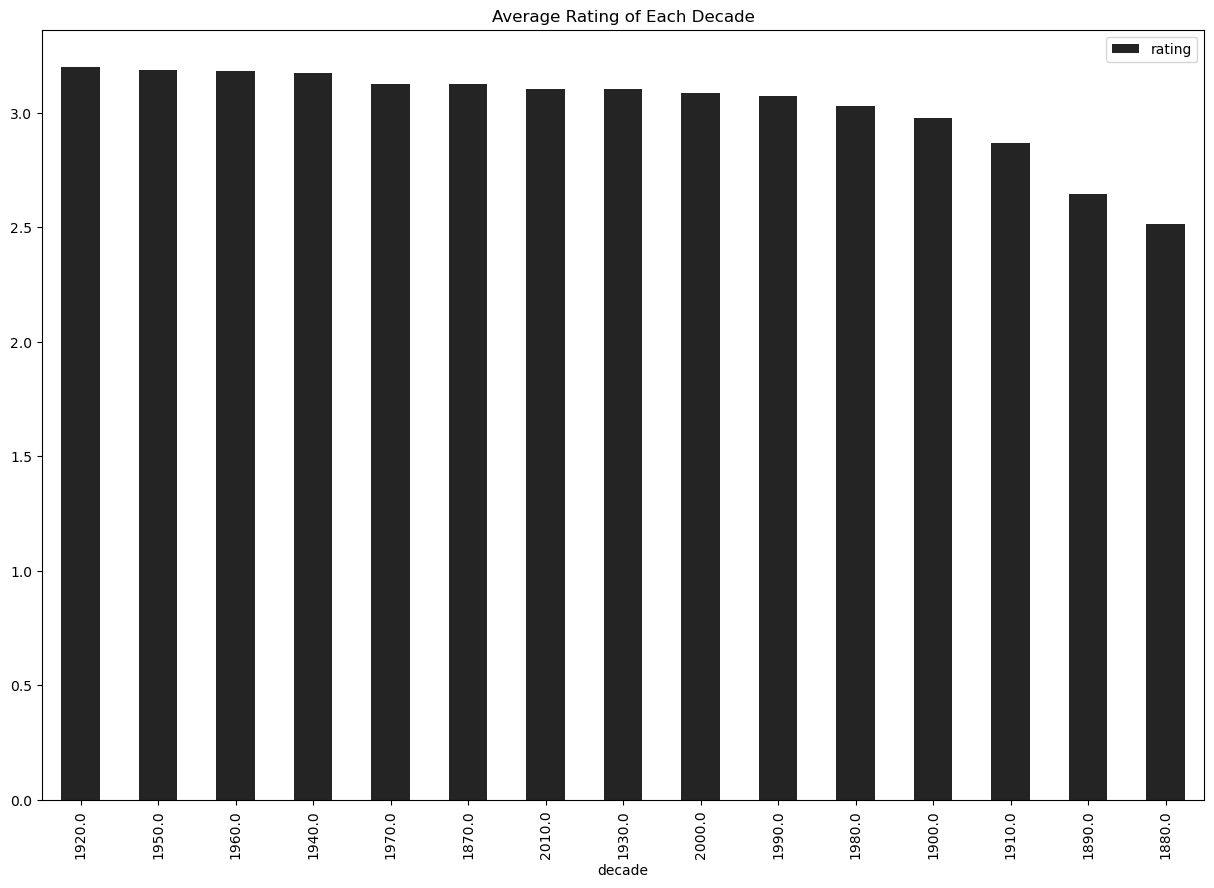

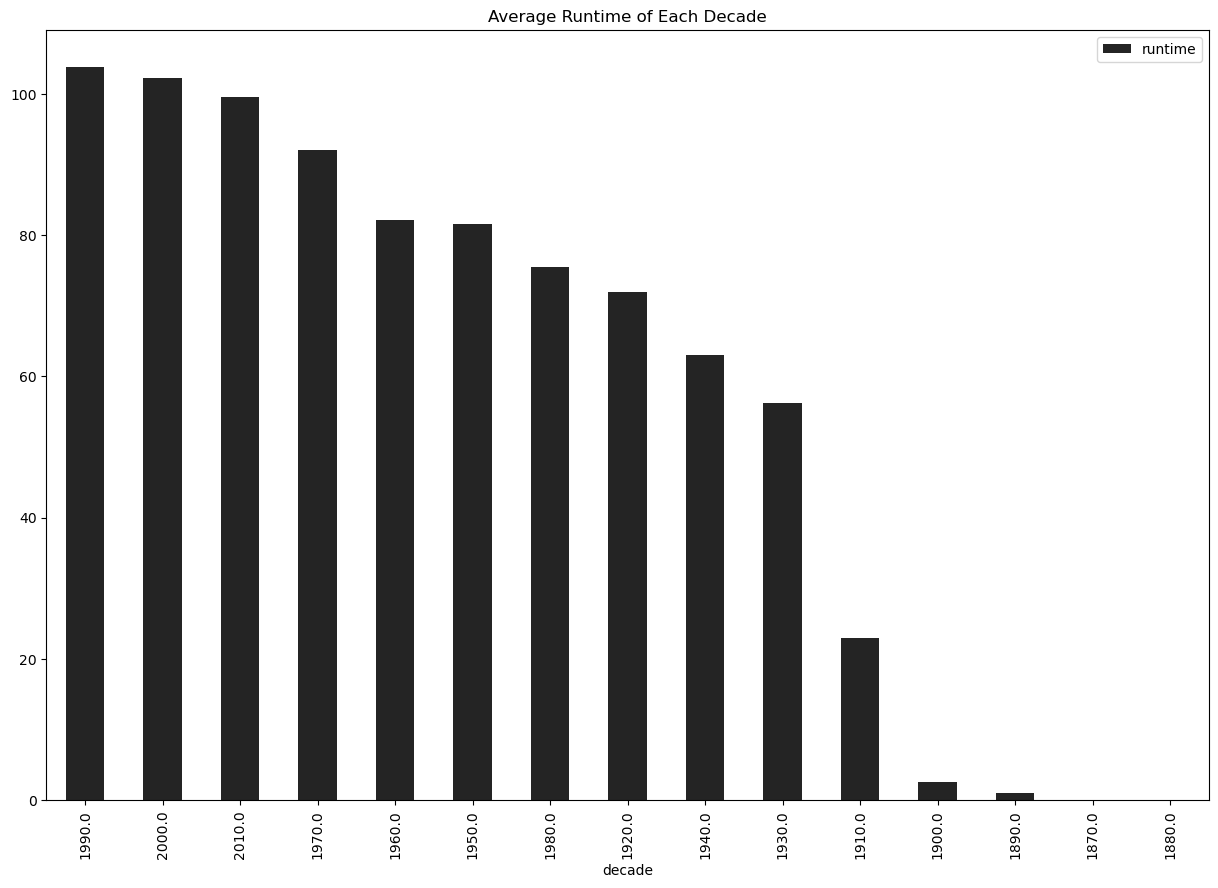

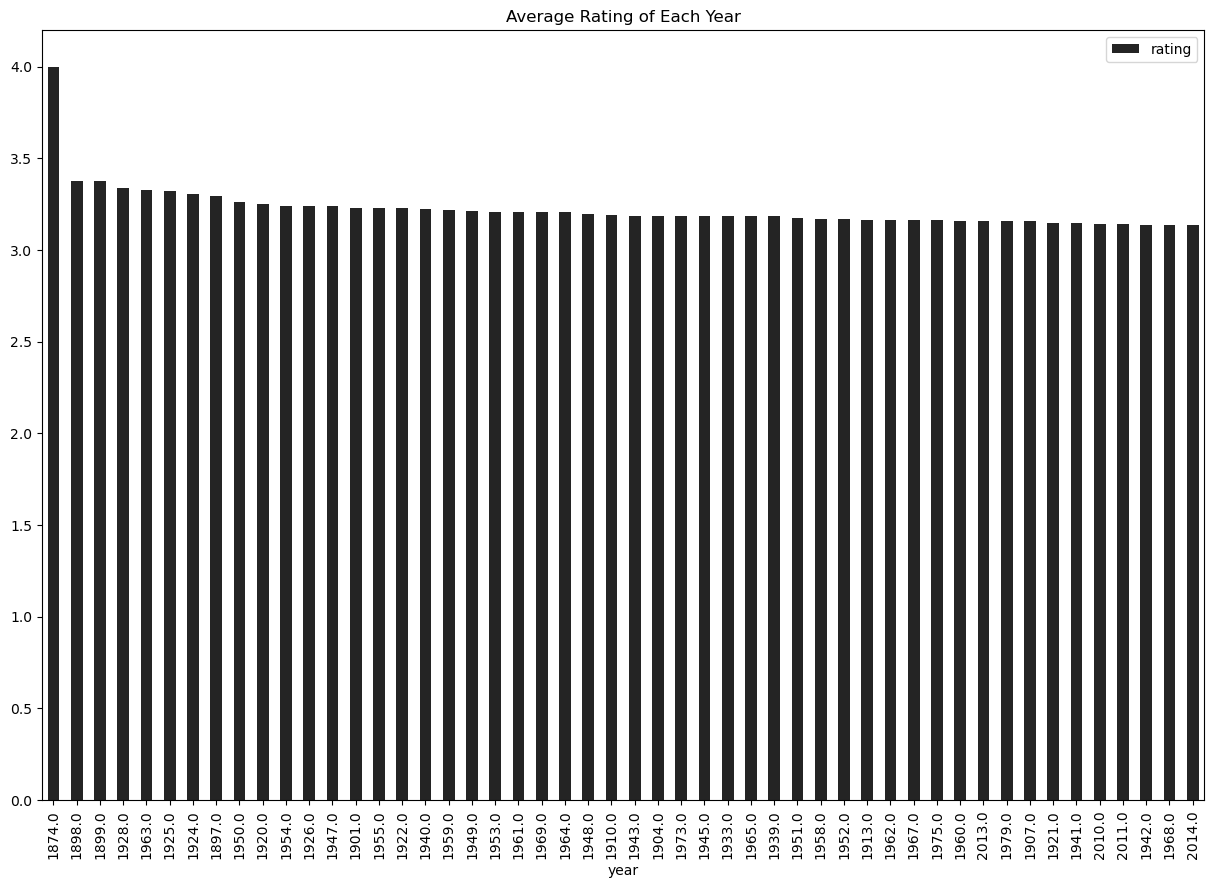

In [86]:
# find the average rating of each decade
avg_rating_decade = new_df.groupby(['decade'])['rating'].mean().reset_index()
avg_rating_decade = avg_rating_decade.sort_values(by='rating', ascending=False)
#plot the average rating of each decade
avg_rating_decade.plot(x='decade', y='rating', kind='bar', figsize=(15, 10), title='Average Rating of Each Decade')

# find the average runtime of each decade
avg_runtime_decade = new_df.groupby(['decade'])['runtime'].mean().reset_index()
avg_runtime_decade = avg_runtime_decade.sort_values(by='runtime', ascending=False)
#plot the average runtime of each decade
avg_runtime_decade.plot(x='decade', y='runtime', kind='bar', figsize=(15, 10), title='Average Runtime of Each Decade')

# find the average rating of each year
avg_rating_year = new_df.groupby(['year'])['rating'].mean().reset_index()
avg_rating_year = avg_rating_year.sort_values(by='rating', ascending=False)
#plot the average rating of each year
avg_rating_year.head(50).plot(x='year', y='rating', kind='bar', figsize=(15, 10), title='Average Rating of Each Year')

<Axes: title={'center': 'Movie Count for Each Year'}, xlabel='year'>

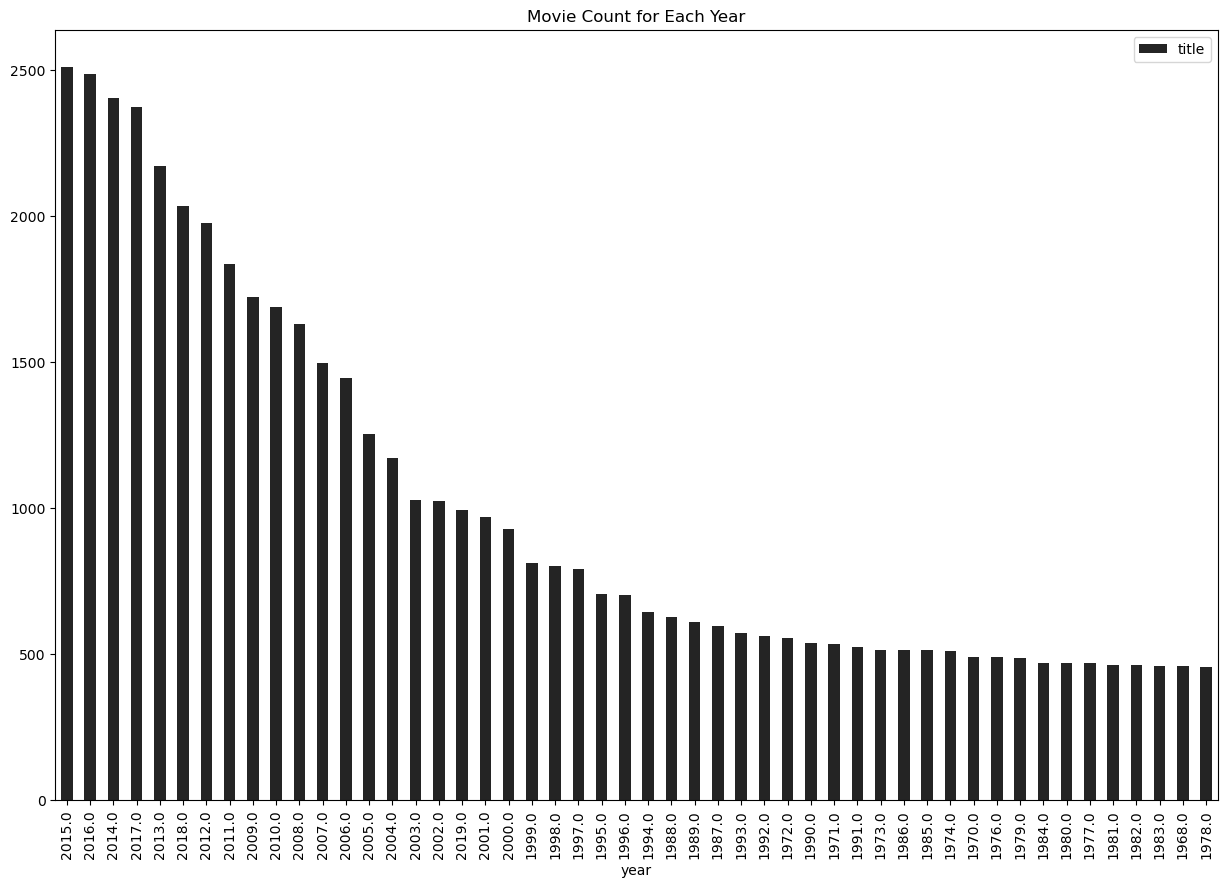

In [87]:
# get the movie count for each year and sort them in descending order
movie_count_year = new_df.groupby(['year'])['title'].count().reset_index()
movie_count_year = movie_count_year.sort_values(by='title', ascending=False)
#plot the movie count for each year
movie_count_year.head(50).plot(x='year', y='title', kind='bar', figsize=(15, 10), title='Movie Count for Each Year')

<Axes: title={'center': 'Average Views of Each Director'}, xlabel='director'>

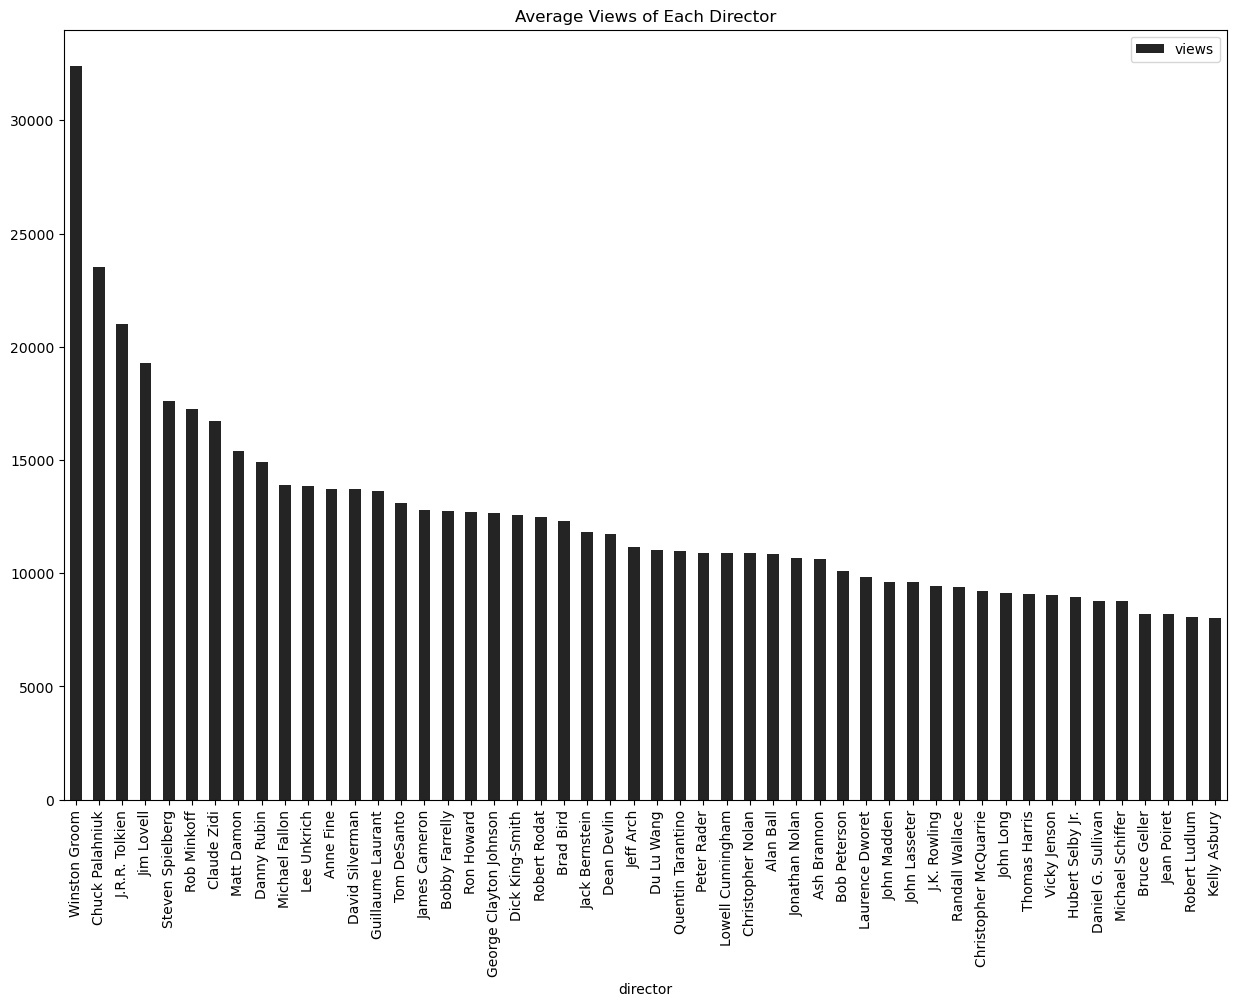

In [88]:
# find and plot the average views of each director
avg_views_director = new_df.groupby(['director'])['views'].mean().reset_index()
avg_views_director = avg_views_director.sort_values(by='views', ascending=False)
avg_views_director.head(50).plot(x='director', y='views', kind='bar', figsize=(15, 10), title='Average Views of Each Director')

In [89]:
# find and plot the average views of each director
avg_views_director = new_df.groupby(['director'])['views'].sum().reset_index()
avg_views_director = avg_views_director.sort_values(by='views', ascending=False)
avg_views_director.head(50)#.plot(x='director', y='views', kind='bar', figsize=(15, 10), title='Average Views of Each Director')

,director,views
0,,2969695.0
7945,Quentin Tarantino,109919.0
6711,Michael Crichton,65157.0
3958,J.R.R. Tolkien,62963.0
5931,Lilly Wachowski,60988.0
9208,Stephen King,59903.0
2948,Ethan Coen,51185.0
4057,James Cameron,51178.0
6020,Luc Besson,44015.0
5023,Jonathan Nolan,42645.0


<a id="six"></a>
## 6. Collaborative Filtering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---
### Collaborative Based Filtering Recommender System
Collaborative filtering addresses some of the limitations of content-based filtering; collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.

From the Suprise library, the follwoing algorithms were used:

# Basic algorithms

***BaselineOnly:*** this algorithm predicts the baseline estimate for given user and item.

# Matrix Factorization-based algorithms
***SVD:*** this algorithm is equivalent to Probabilistic Matrix Factorization ( which makes use of data provided by users with similar preferences to offer recommendations to a particular user).

***SVDpp:*** this algorithm is an extension of SVD that takes into account implicit ratings.

***NMF:*** this is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

***SlopeOne:*** this is a straightforward implementation of the SlopeOne algorithm.

***Coclustering:*** is a collaborative filtering algorithm based on co-clustering.

In [90]:
df_train.drop('timestamp', axis=1)
train_subset = df_train[:1000000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

## Non Negative Matrix Factorization (NFM)

Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements.

Using the Surprise library for collaborative filtering and specifically the Non-Negative Matrix Factorization (NMF) algorithm. The code you provided fits an NMF model to a training set, makes predictions on a test set, and calculates the root mean square error (RMSE) as a measure of accuracy.

In [92]:
nmf_model = NMF(n_epochs=50, n_factors=200, random_state=42,verbose=True)
# Fits an NMF model to a training set
nmf_model.fit(trainset)
# Makes predictions on a test set
nmf_predictions =nmf_model.test(testset)
# Calculates the root mean square error (RMSE) as a measure of accuracy.
nmf_rmse = accuracy.rmse(nmf_predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 1.10

## Slope One Algorithm

Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms

In [93]:
slo_model = SlopeOne()
slo_model.fit(trainset)
slo_predictions = slo_model.test(testset)
slo_rmse=accuracy.rmse(slo_predictions)

RMSE: 1.0493


## CoClustering Algorithms

Biclustering, block clustering , co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix. The term was first introduced by Boris Mirkin to name a technique introduced many years earlier, in 1972, by J. A. Hartigan.

In [94]:
cc_model = CoClustering(n_epochs=50,random_state=42)
cc_model.fit(trainset)
cc_predictions = cc_model.test(testset)
cc_rmse=accuracy.rmse(cc_predictions)

RMSE: 1.0162


## Singular Value Decomposition plus-plus (SVDpp)

The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

In [95]:
svdpp_model = SVDpp(n_epochs=50,n_factors=400,init_std_dev=0.001,random_state=42, verbose=True)
svdpp_model.fit(trainset)
svdpp_predictions = svdpp_model.test(testset)
svdpp_rmse = accuracy.rmse(svdpp_predictions)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29
 processing epoch 30
 processing epoch 31
 processing epoch 32
 processing epoch 33
 processing epoch 34
 processing epoch 35
 processing epoch 36
 processing epoch 37
 processing epoch 38
 processing epoch 39
 processing epoch 40
 processing epoch 41
 processing epoch 42
 processing epoch 43
 processing epoch 44
 processing epoch 45
 processing epoch 46
 processing epoch 47
 p

## Singular Value Decomposition (SVD)

In [96]:
# Displaying the first 5 rows of the 'df_train' DataFrame for an overview of the data.
df_train.head()

,userId,movieId,rating,timestamp,day_of_week
0,5163,57669,4.0,1970-01-18 13:45:49.992,Sun
1,106343,5,4.5,1970-01-14 23:03:58.739,Wed
2,146790,5459,5.0,1970-01-13 10:56:55.539,Tue
3,106362,32296,2.0,1970-01-17 11:17:22.565,Sat
4,9041,366,3.0,1970-01-10 15:29:35.837,Sat


In [97]:
# load data for Surprise
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], Reader())

In [98]:
# Split data into 99% train and 1% test
X_train, X_test = train_test_split(data, test_size=0.01, random_state = 42)

In [99]:
# Define the model as SVD with 100 factors and a learning rate of 0.005
svd = SVD(n_epochs = 40, n_factors = 1200, init_std_dev = 0.005, random_state = 400)

In [100]:
# Fit the model to the training set
svd.fit(X_train)

In [101]:
# Predict ratings for the test data set and calculate RMSE
test_pred= svd.test(X_test)     
rsme_m = accuracy.rmse(test_pred, verbose=True)

RMSE: 0.7803


In [102]:
# Predict ratings for the test data set
y_pred = [svd.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]

In [103]:
# Create a new dataframe with the column names from the original dataset
df_test['Id'] = df_test['userId'].astype(str) +'_'+ df_test['movieId'].astype(str)

# add predictions to pandas Dataframe
df_pred = pd.DataFrame(y_pred) 

# rename columns
df_pred = df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})

# drop unnecessary columns
df_pred.drop(['r_ui','details'], axis=1, inplace = True)

# make submission file and submit
submission = pd.DataFrame({"Id":df_test.Id, "rating":df_pred.rating})
submission.to_csv('base_T(svd).csv', index=False) # convert Dataframe to CSV file
print('kaggle submission file generated successfully')

kaggle submission file generated successfully


## Baseline Only Algorithm

Algorithm predicting the baseline estimate for given user and item.

In [105]:
bsl_options = {'method': 'sgd','n_epochs': 50}
blo_model = BaselineOnly(bsl_options=bsl_options,verbose=True)
blo_model.fit(trainset)
blo_predictions = blo_model.test(testset)
# Calculate RMSE
blo_rmse = accuracy.rmse(blo_predictions)

Estimating biases using sgd...
RMSE: 0.9021


<a id="seven"></a>
## 7. Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


---

We built and tested six different collaborative filtering models and compared their performance using a statistical measure known as the root mean squared error (RMSE), which determines the average squared difference between the estimated values and the actual value. A low RMSE value indicates high model accuracy.

### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$         

In [106]:
# Compare model performance
#rmse_scores =[nmf_rmse,slo_rmse,cc_rmse,svd_rmse,svdpp_rmse,blo_rmse]
#models =['NMF','SlopeOne','CoClustering','SVD','SVD++','BaselineOnly']
rmse_scores =[nmf_rmse, slo_rmse, cc_rmse, svdpp_rmse, blo_rmse, rsme_m]
models =['NMF','SlopeOne','CoClustering', 'SVD++', 'BaselineOnly', 'SVD']

accuracy_data = pd.DataFrame({'model':models,'RMSE':rmse_scores})

In [107]:
accuracy_data.sort_values(by='RMSE')

,model,RMSE
5,SVD,0.780344
3,SVD++,0.896582
4,BaselineOnly,0.902062
2,CoClustering,1.016168
1,SlopeOne,1.049265
0,NMF,1.103542


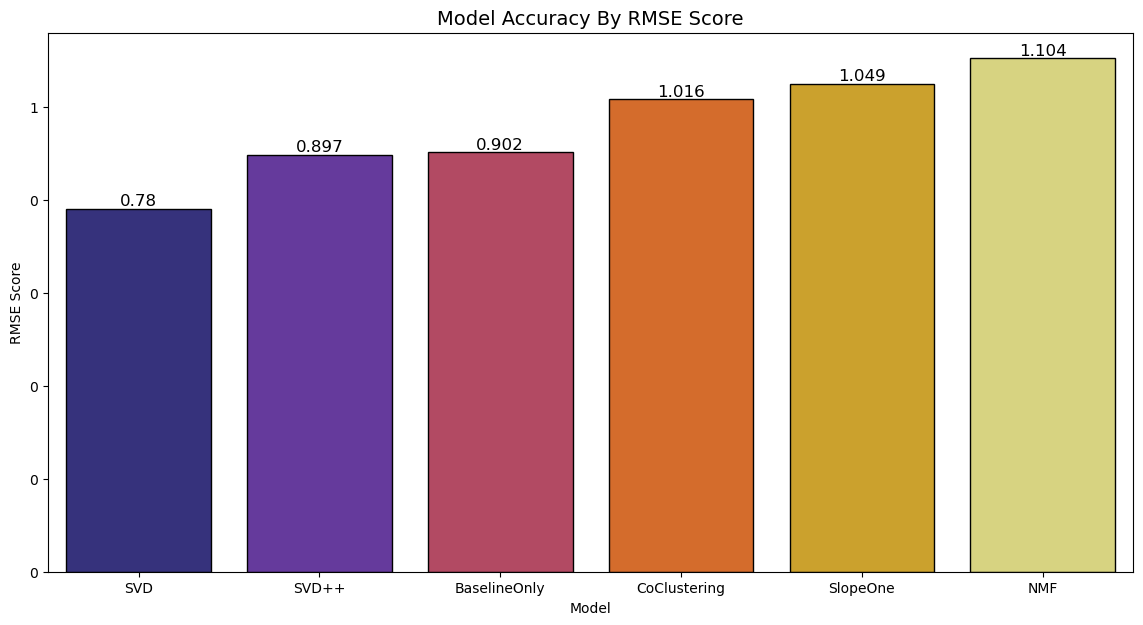

In [108]:
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=accuracy_data.sort_values(by='RMSE'), x='model', y='RMSE', palette="CMRmap", edgecolor="black", ax=ax)
ax.set_xlabel("Model")
ax.set_ylabel('RMSE Score')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
plt.title('Model Accuracy By RMSE Score', fontsize=14)
plt.show()

### Model Interpretability and Explainability

In the context of machine learning and artificial intelligence, <b>explainability</b> and <b>interpretability</b> are often used interchangeably. While they are very closely related, it’s worth unpicking the differences, if only to see how complicated things can get once you start digging deeper into machine learning systems.

<b>Interpretability</b> is about the extent to which a cause and effect can be observed within a system. Or, to put it another way, it is the extent to which you are able to predict what is going to happen, given a change in input or algorithmic parameters. It’s being able to look at an algorithm and go yep, I can see what’s happening here.

<b>Explainability</b>, meanwhile, is the extent to which the internal mechanics of a machine or deep learning system can be explained in human terms. 

It’s easy to miss the subtle difference with interpretability, but consider it like this: interpretability is about being able to discern the mechanics without necessarily knowing why. Explainability is being able to quite literally explain what is happening.

### Model Performance Based On RMSE Evaluation.

We implemented a few models for Both the collaborative and content-based filtering to find a model that gives us the best rmse score which is a representation of our model performance. The model with the best rmse score was the singular value decomposition (SVD). The SVD is very good at noise detection and does this by reducing the dimensions of a matrix in order to make certain subsequent matrix calculations simpler, which is why it gave better RSME score. By the Implementation of Singular Value Decomposition, which returned a very good score of 0.78428  we can conclude that the algorithm implemented for our app is very good at movie recommendations.

<a id="eight"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
---

In this notebook, the movieLens dataset was used to create our recommender system. The dataset draws on movie ratings and movie specific data dating back over 50 years from 1976 all the way to 2020. The EDA section revealed to us that there was an increase in movie production from 1990 to 2000 which subsequently slowed down in the last few years.
We observed that a high percentage of our movies were rated above  3  with the top 3 occurring ratings being 4, 3 and 5 in that order and that alone comprised 50% of total ratings. There are 19 unique movie genres in the dataset with Drama, comedy and thriller being the 3 most popular genres.


We attempted  6 different techniques for building a collaboration based recommender system with SVD as our best technique. The cosine similarity algorithm was used in the content based recommender system. 


In order to produce new recommendations we attempted collaborative based filtering methods because they draw only on past interactions between users and items. These methods do not require item meta-data like their content-based counterparts. This has an added advantage of adapting users' interest which might change over time.


We found that  sparsity and scalability were a challenge when we attempted both user-based and item-based memory methods. We settled on the singular value decomposition(SVD), a collaborative filtering method that deals with the sparsity that  we had with the user-user and item-item memory based methods, the advantage of being computationally more efficient than content based method .


The SVD model was able to predict new movies with a RMSE score of 0.78330 on kaggle.


**Possible improvements:**

Collaborative filtering methods have an issue with the cold start problem, which the content based filtering method doesn’t. This problem can be addressed by implementing a hybrid recommender system that uses a combination of both content and collaborative filtering based methods.


---


## References
---
---
A Study on Recommendation System with Library Data: Master’s Thesis in Computer Science - Umesh Raj Satyal (2019)

https://codeburst.io/explanation-of-recommender-systems-in-information-retrieval-13077e1d916c [Accessed: 14/07/2023]

Lungu, C. (2018). Building a recommender system. [online] Machine Learning Blog. Available at: http://www.clungu.com/Building-a-recommender-system

Cold start problem - http://www.yusp.com/blog/cold-start-problem-recommender-systems/ 32a. Frank Kane, Sundog Education

Towards datascience. 2018. Building and Testing Recommender Systems With Surprise, Step-By-Step. [ONLINE] Available at: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b. [Accessed 13 December 2020].

---
